In [126]:
from google.colab import files
uploaded = files.upload()

Saving Company_Data2015-1.xlsx to Company_Data2015-1 (1).xlsx


In [282]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import sklearn.metrics as metrics
%matplotlib inline
from scipy import stats
import warnings 
warnings.filterwarnings( "ignore")

In [283]:
df = pd.read_excel("Company_Data2015-1.xlsx")

In [284]:
df.head()

Co_Code          Co_Name  Networth Next Year  Equity Paid Up  Networth  \
0    16974      Hind.Cables            -8021.60          419.36  -7027.48   
1    21214  Tata Tele. Mah.            -3986.19         1954.93  -2968.08   
2    14852     ABG Shipyard            -3192.58           53.84    506.86   
3     2439              GTL            -3054.51          157.30   -623.49   
4    23505  Bharati Defence            -2967.36           50.30  -1070.83   

   Capital Employed  Total Debt  Gross Block   Net Working Capital   \
0          -1007.24     5936.03        474.30              -1076.34   
1           4458.20     7410.18       9070.86              -1098.88   
2           7714.68     6944.54       1281.54               4496.25   
3           2353.88     2326.05       1033.69              -2612.42   
4           4675.33     5740.90       1084.20               1836.23   

   Current Assets   ...  PBIDTM (%)[Latest]  PBITM (%)[Latest]  \
0            40.50  ...                0.00               0.00   
1           486.86  ...              -10.30             -39.74   
2          9097.64  ...            -5279.14           -5516.98   
3          1034.12  ...               -3.33              -7.21   
4          4685.81  ...             -295.55            -400.55   

   PBDTM (%)[Latest]  CPM (%)[Latest]  APATM (%)[Latest]  \
0               0.00             0.00               0.00   
1             -57.74           -57.74             -87.18   
2           -7780.25         -7723.67           -7961.51   
3             -48.13           -47.70             -51.58   
4            -845.88           379.79             274.79   

   Debtors Velocity (Days)  Creditors Velocity (Days)  \
0                        0                          0   
1                       29                        101   
2                       97                        558   
3                       93                         63   
4                     3887                        346   

   Inventory Velocity (Days)  Value of Output/Total Assets  \
0                       45.0                          0.00   
1                        2.0                          0.31   
2                        0.0                         -0.03   
3                        2.0                          0.24   
4                        0.0                          0.01   

   Value of Output/Gross Block  
0                         0.00  
1                         0.24  
2                        -0.26  
3                         1.90  
4                         0.05  

[5 rows x 67 columns]

In [285]:
df.columns

Index(['Co_Code', 'Co_Name', 'Networth Next Year', 'Equity Paid Up',
       'Networth', 'Capital Employed', 'Total Debt', 'Gross Block ',
       'Net Working Capital ', 'Current Assets ',
       'Current Liabilities and Provisions ', 'Total Assets/Liabilities ',
       'Gross Sales', 'Net Sales', 'Other Income', 'Value Of Output',
       'Cost of Production', 'Selling Cost', 'PBIDT', 'PBDT', 'PBIT', 'PBT',
       'PAT', 'Adjusted PAT', 'CP', 'Revenue earnings in forex',
       'Revenue expenses in forex', 'Capital expenses in forex',
       'Book Value (Unit Curr)', 'Book Value (Adj.) (Unit Curr)',
       'Market Capitalisation', 'CEPS (annualised) (Unit Curr)',
       'Cash Flow From Operating Activities',
       'Cash Flow From Investing Activities',
       'Cash Flow From Financing Activities', 'ROG-Net Worth (%)',
       'ROG-Capital Employed (%)', 'ROG-Gross Block (%)',
       'ROG-Gross Sales (%)', 'ROG-Net Sales (%)',
       'ROG-Cost of Production (%)', 'ROG-Total Assets (%)', 

Fixing messy column names (containing spaces) for ease of use

In [286]:
df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('.', '').str.replace('%', 'perc').str.replace('(', '').str.replace(')', '').str.replace('/','_by_').str.replace('[', '_').str.replace(']', '').str.replace('-', '_')

In [287]:
df.columns

Index(['Co_Code', 'Co_Name', 'Networth_Next_Year', 'Equity_Paid_Up',
       'Networth', 'Capital_Employed', 'Total_Debt', 'Gross_Block',
       'Net_Working_Capital', 'Current_Assets',
       'Current_Liabilities_and_Provisions', 'Total_Assets_by_Liabilities',
       'Gross_Sales', 'Net_Sales', 'Other_Income', 'Value_Of_Output',
       'Cost_of_Production', 'Selling_Cost', 'PBIDT', 'PBDT', 'PBIT', 'PBT',
       'PAT', 'Adjusted_PAT', 'CP', 'Revenue_earnings_in_forex',
       'Revenue_expenses_in_forex', 'Capital_expenses_in_forex',
       'Book_Value_Unit_Curr', 'Book_Value_Adj_Unit_Curr',
       'Market_Capitalisation', 'CEPS_annualised_Unit_Curr',
       'Cash_Flow_From_Operating_Activities',
       'Cash_Flow_From_Investing_Activities',
       'Cash_Flow_From_Financing_Activities', 'ROG_Net_Worth_perc',
       'ROG_Capital_Employed_perc', 'ROG_Gross_Block_perc',
       'ROG_Gross_Sales_perc', 'ROG_Net_Sales_perc',
       'ROG_Cost_of_Production_perc', 'ROG_Total_Assets_perc',
      

In [288]:
df.head()

Co_Code          Co_Name  Networth_Next_Year  Equity_Paid_Up  Networth  \
0    16974      Hind.Cables            -8021.60          419.36  -7027.48   
1    21214  Tata Tele. Mah.            -3986.19         1954.93  -2968.08   
2    14852     ABG Shipyard            -3192.58           53.84    506.86   
3     2439              GTL            -3054.51          157.30   -623.49   
4    23505  Bharati Defence            -2967.36           50.30  -1070.83   

   Capital_Employed  Total_Debt  Gross_Block  Net_Working_Capital  \
0          -1007.24     5936.03       474.30             -1076.34   
1           4458.20     7410.18      9070.86             -1098.88   
2           7714.68     6944.54      1281.54              4496.25   
3           2353.88     2326.05      1033.69             -2612.42   
4           4675.33     5740.90      1084.20              1836.23   

   Current_Assets  ...  PBIDTM_perc_Latest  PBITM_perc_Latest  \
0           40.50  ...                0.00               0.00   
1          486.86  ...              -10.30             -39.74   
2         9097.64  ...            -5279.14           -5516.98   
3         1034.12  ...               -3.33              -7.21   
4         4685.81  ...             -295.55            -400.55   

   PBDTM_perc_Latest  CPM_perc_Latest  APATM_perc_Latest  \
0               0.00             0.00               0.00   
1             -57.74           -57.74             -87.18   
2           -7780.25         -7723.67           -7961.51   
3             -48.13           -47.70             -51.58   
4            -845.88           379.79             274.79   

   Debtors_Velocity_Days  Creditors_Velocity_Days  Inventory_Velocity_Days  \
0                      0                        0                     45.0   
1                     29                      101                      2.0   
2                     97                      558                      0.0   
3                     93                       63                      2.0   
4                   3887                      346                      0.0   

   Value_of_Output_by_Total_Assets  Value_of_Output_by_Gross_Block  
0                             0.00                            0.00  
1                             0.31                            0.24  
2                            -0.03                           -0.26  
3                             0.24                            1.90  
4                             0.01                            0.05  

[5 rows x 67 columns]

In [289]:
df.shape

(3586, 67)

In [290]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 67 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Co_Code                              3586 non-null   int64  
 1   Co_Name                              3586 non-null   object 
 2   Networth_Next_Year                   3586 non-null   float64
 3   Equity_Paid_Up                       3586 non-null   float64
 4   Networth                             3586 non-null   float64
 5   Capital_Employed                     3586 non-null   float64
 6   Total_Debt                           3586 non-null   float64
 7   Gross_Block                          3586 non-null   float64
 8   Net_Working_Capital                  3586 non-null   float64
 9   Current_Assets                       3586 non-null   float64
 10  Current_Liabilities_and_Provisions   3586 non-null   float64
 11  Total_Assets_by_Liabilities   

In [291]:
print("The no. of rows: ",df.shape[0], "\n""The no. of columns: ",df.shape[1])

The no. of rows:  3586 
The no. of columns:  67


In [292]:
df.dtypes

Co_Code                              int64
Co_Name                             object
Networth_Next_Year                 float64
Equity_Paid_Up                     float64
Networth                           float64
                                    ...   
Debtors_Velocity_Days                int64
Creditors_Velocity_Days              int64
Inventory_Velocity_Days            float64
Value_of_Output_by_Total_Assets    float64
Value_of_Output_by_Gross_Block     float64
Length: 67, dtype: object

In [293]:
df.isnull().sum()

Co_Code                              0
Co_Name                              0
Networth_Next_Year                   0
Equity_Paid_Up                       0
Networth                             0
                                  ... 
Debtors_Velocity_Days                0
Creditors_Velocity_Days              0
Inventory_Velocity_Days            103
Value_of_Output_by_Total_Assets      0
Value_of_Output_by_Gross_Block       0
Length: 67, dtype: int64

In [294]:
#Columns with missing values
print(np.where(df.isnull().sum()>0))

(array([29, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 64]),)


In [295]:
df.describe().T

count          mean           std      min  \
Co_Code                          3586.0  16065.388734  19776.817379     4.00   
Networth_Next_Year               3586.0    725.045251   4769.681004 -8021.60   
Equity_Paid_Up                   3586.0     62.966584    778.761744     0.00   
Networth                         3586.0    649.746299   4091.988792 -7027.48   
Capital_Employed                 3586.0   2799.611054  26975.135385 -1824.75   
...                                 ...           ...           ...      ...   
Debtors_Velocity_Days            3586.0    603.894032  10636.759580     0.00   
Creditors_Velocity_Days          3586.0   2057.854992  54169.479197     0.00   
Inventory_Velocity_Days          3483.0     79.644559    137.847792  -199.00   
Value_of_Output_by_Total_Assets  3586.0      0.819757      1.201400    -0.33   
Value_of_Output_by_Gross_Block   3586.0     61.884548    976.824352   -61.00   

                                       25%       50%         75%         max  
Co_Code                          3029.2500  6077.500  24269.5000    72493.00  
Networth_Next_Year                  3.9850    19.015    123.8025   111729.10  
Equity_Paid_Up                      3.7500     8.290     19.5175    42263.46  
Networth                            3.8925    18.580    117.2975    81657.35  
Capital_Employed                    7.6025    39.090    226.6050   714001.25  
...                                    ...       ...         ...         ...  
Debtors_Velocity_Days               8.0000    49.000    106.0000   514721.00  
Creditors_Velocity_Days             8.0000    39.000     89.0000  2034145.00  
Inventory_Velocity_Days             0.0000    35.000     96.0000      996.00  
Value_of_Output_by_Total_Assets     0.0700     0.480      1.1600       17.63  
Value_of_Output_by_Gross_Block      0.2700     1.530      4.9100    43404.00  

[66 rows x 8 columns]

In [296]:
print("The no. of duplicated rows is: ",df.duplicated().sum())

The no. of duplicated rows is:  0


We are dropping 'Co_Name' as it adds no value to the data.

In [297]:
df = df.drop(['Co_Name'],axis=1)

In [298]:
df = df.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(df.columns.values)
len(lstnumericcolumns)

66

In [299]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 66 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Co_Code                              3586 non-null   int64  
 1   Networth_Next_Year                   3586 non-null   float64
 2   Equity_Paid_Up                       3586 non-null   float64
 3   Networth                             3586 non-null   float64
 4   Capital_Employed                     3586 non-null   float64
 5   Total_Debt                           3586 non-null   float64
 6   Gross_Block                          3586 non-null   float64
 7   Net_Working_Capital                  3586 non-null   float64
 8   Current_Assets                       3586 non-null   float64
 9   Current_Liabilities_and_Provisions   3586 non-null   float64
 10  Total_Assets_by_Liabilities          3586 non-null   float64
 11  Gross_Sales                   

Now all the columns are of numeric data type

1.2 Missing Value Treatment

Lets treat these missing values with median (replacement with median eliminates impact of outliers in the treatment)

In [300]:
df.isnull().sum()

Co_Code                              0
Networth_Next_Year                   0
Equity_Paid_Up                       0
Networth                             0
Capital_Employed                     0
                                  ... 
Debtors_Velocity_Days                0
Creditors_Velocity_Days              0
Inventory_Velocity_Days            103
Value_of_Output_by_Total_Assets      0
Value_of_Output_by_Gross_Block       0
Length: 66, dtype: int64

In [301]:
#Columns with missing values
print(np.where(df.isnull().sum()>0))

(array([28, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 63]),)


In [302]:
df.columns[df.isnull().any()].tolist()

['Book_Value_Adj_Unit_Curr',
 'Current_Ratio_Latest',
 'Fixed_Assets_Ratio_Latest',
 'Inventory_Ratio_Latest',
 'Debtors_Ratio_Latest',
 'Total_Asset_Turnover_Ratio_Latest',
 'Interest_Cover_Ratio_Latest',
 'PBIDTM_perc_Latest',
 'PBITM_perc_Latest',
 'PBDTM_perc_Latest',
 'CPM_perc_Latest',
 'APATM_perc_Latest',
 'Inventory_Velocity_Days']

In [303]:
null_counts = df.isnull().sum()
null_counts[null_counts > 0]

Book_Value_Adj_Unit_Curr               4
Current_Ratio_Latest                   1
Fixed_Assets_Ratio_Latest              1
Inventory_Ratio_Latest                 1
Debtors_Ratio_Latest                   1
Total_Asset_Turnover_Ratio_Latest      1
Interest_Cover_Ratio_Latest            1
PBIDTM_perc_Latest                     1
PBITM_perc_Latest                      1
PBDTM_perc_Latest                      1
CPM_perc_Latest                        1
APATM_perc_Latest                      1
Inventory_Velocity_Days              103
dtype: int64

In [304]:
col=list(df)

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

df = pd.DataFrame(imputer.fit_transform(df))
df.columns=col
df.head()

Co_Code  Networth_Next_Year  Equity_Paid_Up  Networth  Capital_Employed  \
0  16974.0            -8021.60          419.36  -7027.48          -1007.24   
1  21214.0            -3986.19         1954.93  -2968.08           4458.20   
2  14852.0            -3192.58           53.84    506.86           7714.68   
3   2439.0            -3054.51          157.30   -623.49           2353.88   
4  23505.0            -2967.36           50.30  -1070.83           4675.33   

   Total_Debt  Gross_Block  Net_Working_Capital  Current_Assets  \
0     5936.03       474.30             -1076.34           40.50   
1     7410.18      9070.86             -1098.88          486.86   
2     6944.54      1281.54              4496.25         9097.64   
3     2326.05      1033.69             -2612.42         1034.12   
4     5740.90      1084.20              1836.23         4685.81   

   Current_Liabilities_and_Provisions  ...  PBIDTM_perc_Latest  \
0                             1116.85  ...                0.00   
1                             1585.74  ...              -10.30   
2                             4601.39  ...            -5279.14   
3                             3646.54  ...               -3.33   
4                             2849.58  ...             -295.55   

   PBITM_perc_Latest  PBDTM_perc_Latest  CPM_perc_Latest  APATM_perc_Latest  \
0               0.00               0.00             0.00               0.00   
1             -39.74             -57.74           -57.74             -87.18   
2           -5516.98           -7780.25         -7723.67           -7961.51   
3              -7.21             -48.13           -47.70             -51.58   
4            -400.55            -845.88           379.79             274.79   

   Debtors_Velocity_Days  Creditors_Velocity_Days  Inventory_Velocity_Days  \
0                    0.0                      0.0                     45.0   
1                   29.0                    101.0                      2.0   
2                   97.0                    558.0                      0.0   
3                   93.0                     63.0                      2.0   
4                 3887.0                    346.0                      0.0   

   Value_of_Output_by_Total_Assets  Value_of_Output_by_Gross_Block  
0                             0.00                            0.00  
1                             0.31                            0.24  
2                            -0.03                           -0.26  
3                             0.24                            1.90  
4                             0.01                            0.05  

[5 rows x 66 columns]

In [305]:
df.isnull().sum()

Co_Code                            0
Networth_Next_Year                 0
Equity_Paid_Up                     0
Networth                           0
Capital_Employed                   0
                                  ..
Debtors_Velocity_Days              0
Creditors_Velocity_Days            0
Inventory_Velocity_Days            0
Value_of_Output_by_Total_Assets    0
Value_of_Output_by_Gross_Block     0
Length: 66, dtype: int64

In [306]:
print('The number of missing values after treatment is: ',df.isnull().sum().sum())

The number of missing values after treatment is:  0


1.1 Outlier Treatment

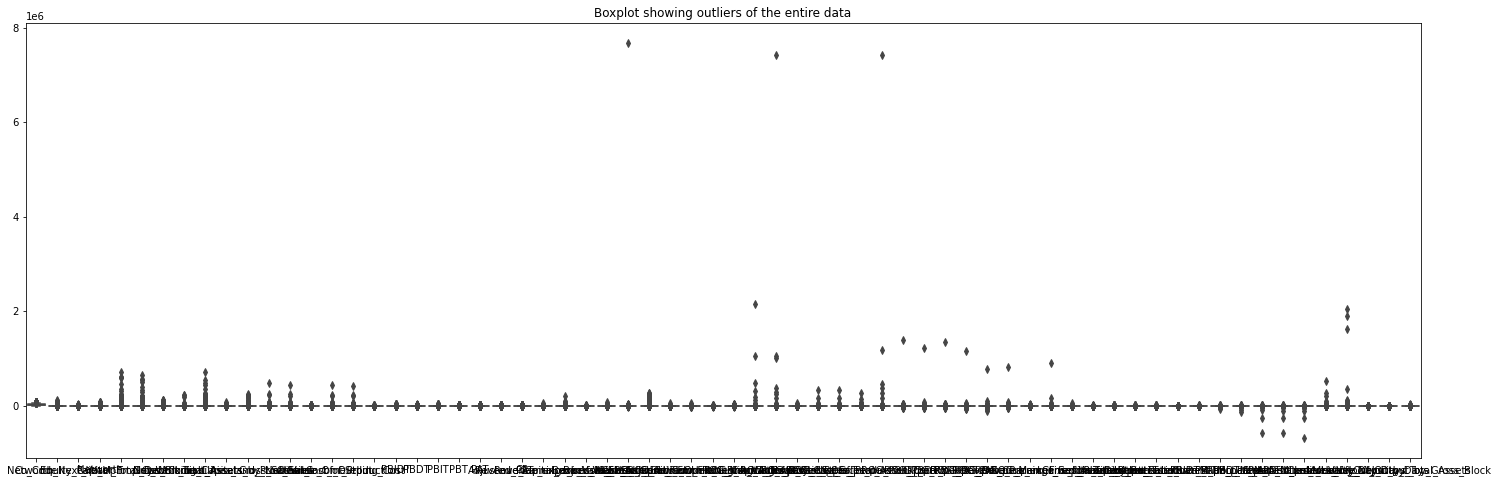

In [307]:
plt.figure(figsize=(25,8))
plt.title("Boxplot showing outliers of the entire data")
sns.boxplot(data=df);

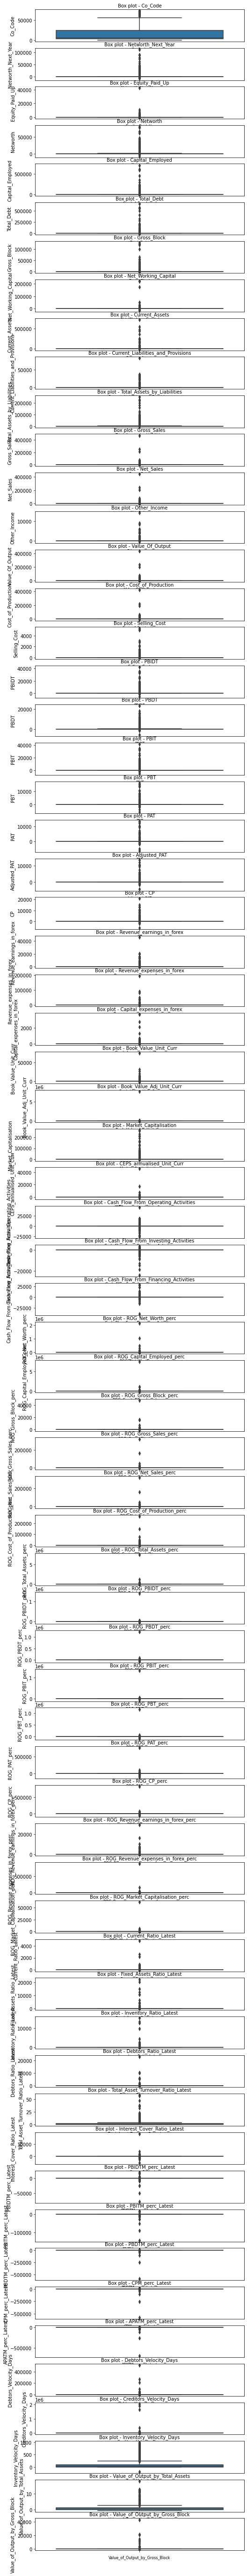

In [308]:
# Checking Outliers in dataset

col_names = list(df.columns)
fig, ax = plt.subplots(len(col_names), figsize=(8,100))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=df[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

In [309]:
df_X = df.drop('Networth_Next_Year', axis = 1)
df_Y = df['Networth_Next_Year']

In [310]:
Q1 = df_X.quantile(0.25)
Q3 = df_X.quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

In [311]:
((df_X > UL) | (df_X < LL)).sum()

Co_Code                            291
Equity_Paid_Up                     448
Networth                           650
Capital_Employed                   596
Total_Debt                         583
                                  ... 
Debtors_Velocity_Days              398
Creditors_Velocity_Days            391
Inventory_Velocity_Days            279
Value_of_Output_by_Total_Assets    150
Value_of_Output_by_Gross_Block     481
Length: 65, dtype: int64

In [312]:
print ('The number of outliers present in the dataset: ', ((df_X > UL) | (df_X < LL)).sum().sum())

The number of outliers present in the dataset:  41666


In [313]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [314]:
for column in df_X.columns:
    lr,ur=remove_outlier(df_X[column])
    df_X[column]=np.where(df_X[column]>ur,ur,df_X[column])
    df_X[column]=np.where(df_X[column]<lr,lr,df_X[column])

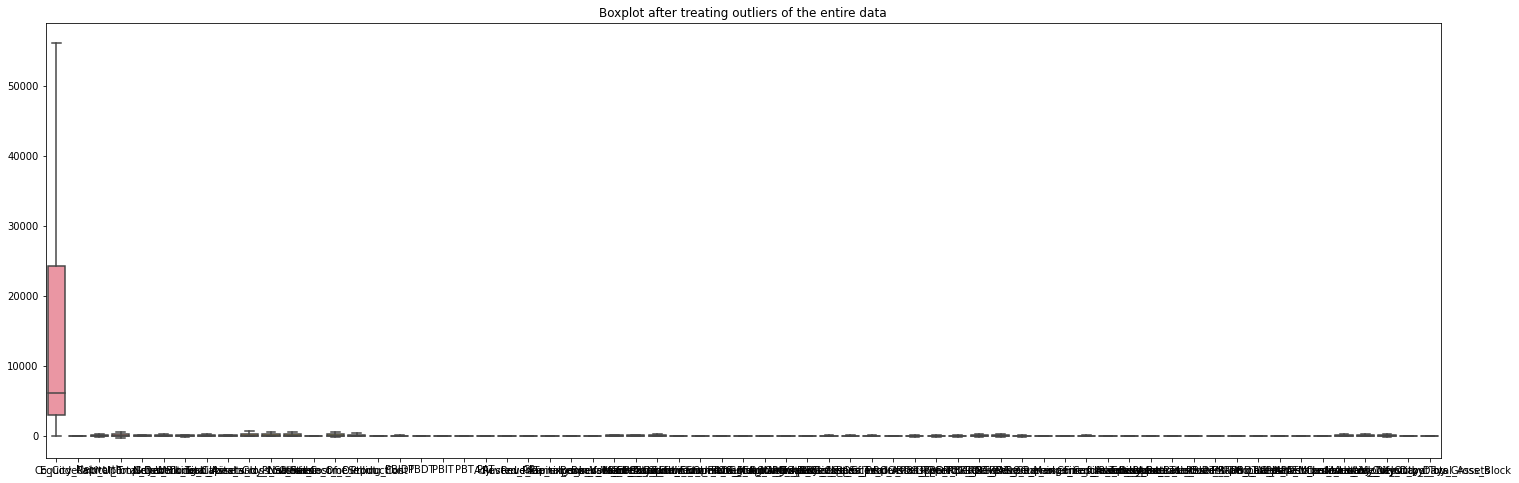

In [315]:
plt.figure(figsize=(25,8))
plt.title("Boxplot after treating outliers of the entire data")
sns.boxplot(data=df_X);

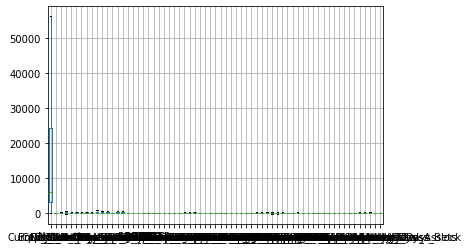

In [316]:
df_X.boxplot();

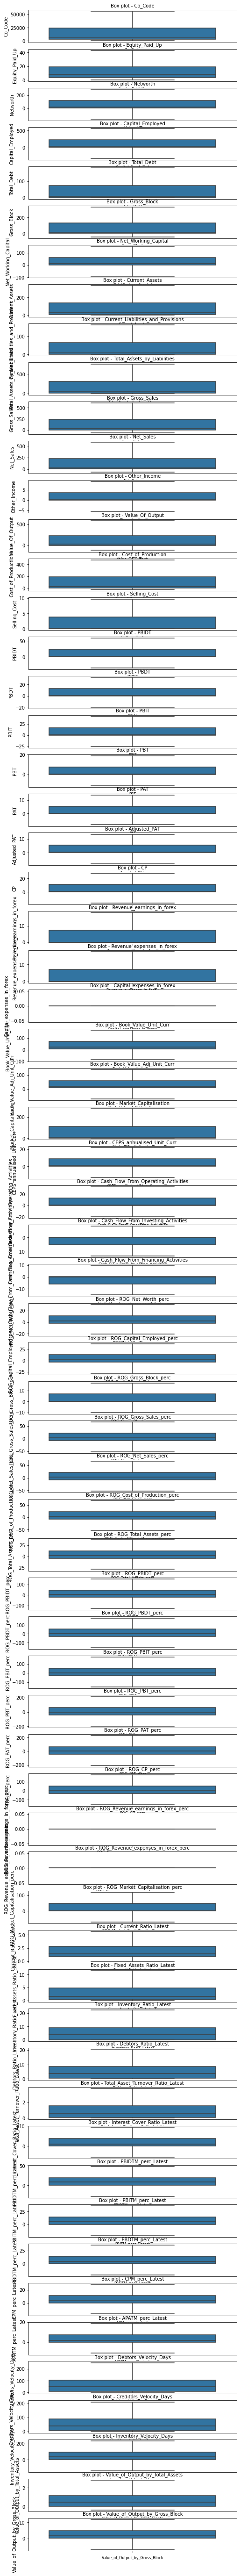

In [317]:
# Checking Outliers in dataset

col_names = list(df_X.columns)
fig, ax = plt.subplots(len(col_names), figsize=(8,100))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=df_X[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

In [318]:
((df_X > UL) | (df_X < LL)).sum()

Co_Code                            0
Equity_Paid_Up                     0
Networth                           0
Capital_Employed                   0
Total_Debt                         0
                                  ..
Debtors_Velocity_Days              0
Creditors_Velocity_Days            0
Inventory_Velocity_Days            0
Value_of_Output_by_Total_Assets    0
Value_of_Output_by_Gross_Block     0
Length: 65, dtype: int64

In [319]:
print ('The number of outliers present in the dataset after outlier treatment: ', ((df_X > UL) | (df_X < LL)).sum().sum())

The number of outliers present in the dataset after outlier treatment:  0


In [320]:
df = pd.concat([df_X, df_Y], axis = 1)

In [321]:
df.head()

Co_Code  Equity_Paid_Up  Networth  Capital_Employed  Total_Debt  \
0  16974.0        43.16875  -166.215        -320.90125      180.83   
1  21214.0        43.16875  -166.215         555.10875      180.83   
2  14852.0        43.16875   287.405         555.10875      180.83   
3   2439.0        43.16875  -166.215         555.10875      180.83   
4  23505.0        43.16875  -166.215         555.10875      180.83   

   Gross_Block  Net_Working_Capital  Current_Assets  \
0     328.8825            -89.40625        40.50000   
1     328.8825            -89.40625       332.19375   
2     328.8825            151.52375       332.19375   
3     328.8825            -89.40625       332.19375   
4     328.8825            151.52375       332.19375   

   Current_Liabilities_and_Provisions  Total_Assets_by_Liabilities  ...  \
0                           163.02625                     109.6000  ...   
1                           163.02625                     760.5175  ...   
2                           163.02625                     760.5175  ...   
3                           163.02625                     760.5175  ...   
4                           163.02625                     760.5175  ...   

   PBITM_perc_Latest  PBDTM_perc_Latest  CPM_perc_Latest  APATM_perc_Latest  \
0             0.0000               0.00          0.00000            0.00000   
1           -21.4275             -21.15        -17.08125          -11.11125   
2           -21.4275             -21.15        -17.08125          -11.11125   
3            -7.2100             -21.15        -17.08125          -11.11125   
4           -21.4275             -21.15         28.46875           18.51875   

   Debtors_Velocity_Days  Creditors_Velocity_Days  Inventory_Velocity_Days  \
0                    0.0                      0.0                     45.0   
1                   29.0                    101.0                      2.0   
2                   97.0                    210.5                      0.0   
3                   93.0                     63.0                      2.0   
4                  253.0                    210.5                      0.0   

   Value_of_Output_by_Total_Assets  Value_of_Output_by_Gross_Block  \
0                             0.00                            0.00   
1                             0.31                            0.24   
2                            -0.03                           -0.26   
3                             0.24                            1.90   
4                             0.01                            0.05   

   Networth_Next_Year  
0            -8021.60  
1            -3986.19  
2            -3192.58  
3            -3054.51  
4            -2967.36  

[5 rows x 66 columns]

1.3 Transform Target variable into 0 and 1

In [322]:
conditions = [(df['Networth_Next_Year']<=0),(df['Networth_Next_Year']>0)]
values = [1,0]
df['Default'] = np.select(conditions,values)

In [323]:
df.head()

Co_Code  Equity_Paid_Up  Networth  Capital_Employed  Total_Debt  \
0  16974.0        43.16875  -166.215        -320.90125      180.83   
1  21214.0        43.16875  -166.215         555.10875      180.83   
2  14852.0        43.16875   287.405         555.10875      180.83   
3   2439.0        43.16875  -166.215         555.10875      180.83   
4  23505.0        43.16875  -166.215         555.10875      180.83   

   Gross_Block  Net_Working_Capital  Current_Assets  \
0     328.8825            -89.40625        40.50000   
1     328.8825            -89.40625       332.19375   
2     328.8825            151.52375       332.19375   
3     328.8825            -89.40625       332.19375   
4     328.8825            151.52375       332.19375   

   Current_Liabilities_and_Provisions  Total_Assets_by_Liabilities  ...  \
0                           163.02625                     109.6000  ...   
1                           163.02625                     760.5175  ...   
2                           163.02625                     760.5175  ...   
3                           163.02625                     760.5175  ...   
4                           163.02625                     760.5175  ...   

   PBDTM_perc_Latest  CPM_perc_Latest  APATM_perc_Latest  \
0               0.00          0.00000            0.00000   
1             -21.15        -17.08125          -11.11125   
2             -21.15        -17.08125          -11.11125   
3             -21.15        -17.08125          -11.11125   
4             -21.15         28.46875           18.51875   

   Debtors_Velocity_Days  Creditors_Velocity_Days  Inventory_Velocity_Days  \
0                    0.0                      0.0                     45.0   
1                   29.0                    101.0                      2.0   
2                   97.0                    210.5                      0.0   
3                   93.0                     63.0                      2.0   
4                  253.0                    210.5                      0.0   

   Value_of_Output_by_Total_Assets  Value_of_Output_by_Gross_Block  \
0                             0.00                            0.00   
1                             0.31                            0.24   
2                            -0.03                           -0.26   
3                             0.24                            1.90   
4                             0.01                            0.05   

   Networth_Next_Year  Default  
0            -8021.60        1  
1            -3986.19        1  
2            -3192.58        1  
3            -3054.51        1  
4            -2967.36        1  

[5 rows x 67 columns]

In [324]:
df.tail()

Co_Code  Equity_Paid_Up  Networth  Capital_Employed  Total_Debt  \
3581   4987.0        43.16875   287.405         555.10875      180.83   
3582    502.0        43.16875   287.405         555.10875      180.83   
3583  12002.0        43.16875   287.405         555.10875      180.83   
3584  12001.0        43.16875   287.405         555.10875      180.83   
3585  15542.0        43.16875   287.405         555.10875      180.83   

      Gross_Block  Net_Working_Capital  Current_Assets  \
3581     328.8825              0.00000       332.19375   
3582     328.8825            151.52375       332.19375   
3583     328.8825            151.52375       332.19375   
3584     328.8825            151.52375       332.19375   
3585     328.8825            -89.40625       332.19375   

      Current_Liabilities_and_Provisions  Total_Assets_by_Liabilities  ...  \
3581                           163.02625                     760.5175  ...   
3582                           163.02625                     760.5175  ...   
3583                           163.02625                     760.5175  ...   
3584                           163.02625                     760.5175  ...   
3585                           163.02625                     760.5175  ...   

      PBDTM_perc_Latest  CPM_perc_Latest  APATM_perc_Latest  \
3581               0.00          0.00000            0.00000   
3582              29.81         28.46875           18.51875   
3583               7.31          5.69000            4.29000   
3584              23.39         19.55000           11.99000   
3585              34.04         25.97000            6.37000   

      Debtors_Velocity_Days  Creditors_Velocity_Days  Inventory_Velocity_Days  \
3581                    0.0                      0.0                     35.0   
3582                   13.0                     53.0                     77.0   
3583                    7.0                     30.0                     48.0   
3584                   32.0                     69.0                     42.0   
3585                   18.0                     74.0                      0.0   

      Value_of_Output_by_Total_Assets  Value_of_Output_by_Gross_Block  \
3581                             0.60                            7.76   
3582                             0.29                            1.00   
3583                             1.42                            3.24   
3584                             0.36                            0.68   
3585                             0.42                            0.49   

      Networth_Next_Year  Default  
3581            72677.77        0  
3582            79162.19        0  
3583            88134.31        0  
3584            91293.70        0  
3585           111729.10        0  

[5 rows x 67 columns]

In [325]:
df[['Default','Networth_Next_Year']].head(5)

Default  Networth_Next_Year
0        1            -8021.60
1        1            -3986.19
2        1            -3192.58
3        1            -3054.51
4        1            -2967.36

In [326]:
df[['Default','Networth_Next_Year']].tail(5)

Default  Networth_Next_Year
3581        0            72677.77
3582        0            79162.19
3583        0            88134.31
3584        0            91293.70
3585        0           111729.10

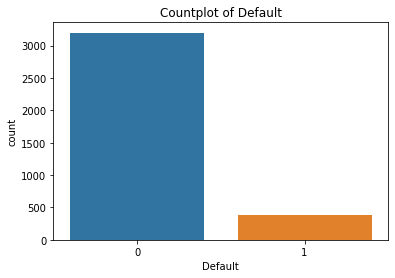

In [327]:
plt.title('Countplot of Default')
sns.countplot(data = df, x = 'Default')

What does variable 'Default' look like

In [328]:
df['Default'].value_counts()

0    3198
1     388
Name: Default, dtype: int64

Checking proportion of Default

In [329]:
df['Default'].value_counts(normalize = True)

0    0.891801
1    0.108199
Name: Default, dtype: float64

1.4 Univariate (4 marks) & Bivariate (6marks) analysis with proper interpretation. (You may choose to include only those variables which were significant in the model building)

In [336]:
significant = df[['Equity_Paid_Up', 'Revenue_expenses_in_forex', 'Market_Capitalisation', 'ROG_Net_Worth_perc', 'ROG_Gross_Block_perc', 'ROG_Cost_of_Production_perc', 'Current_Ratio_Latest', 'Interest_Cover_Ratio_Latest', 'Debtors_Velocity_Days', 'Creditors_Velocity_Days']]

In [337]:
significant = significant.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(significant.columns.values)
len(lstnumericcolumns)

10

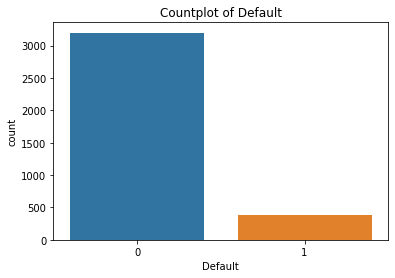

In [349]:
sns.countplot(x=df['Default']);
plt.title('Countplot of Default')
plt.show()

Text(0.5, 0, 'Pie chart of Vote')

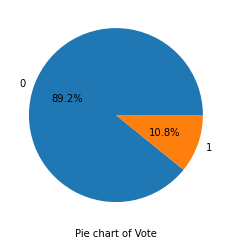

In [350]:
plt.pie(df['Default'].value_counts(),labels=df['Default'].value_counts().index,autopct='%1.1f%%')
plt.xlabel('Pie chart of Vote')

In [338]:
def univariateAnalysis_numeric(column,nbins):
    print("\nDescription of " + column)
    print("----------------------------------------------------------------------------")
    print(df[column].describe(),end=' ')
    print('\n')

In [339]:
significant.skew(axis = 0, skipna = True).sort_values(ascending=False)

Market_Capitalisation          1.203955
Revenue_expenses_in_forex      1.193516
Creditors_Velocity_Days        1.143302
Equity_Paid_Up                 1.141900
Debtors_Velocity_Days          1.136086
Current_Ratio_Latest           1.049903
Interest_Cover_Ratio_Latest    0.497618
ROG_Gross_Block_perc           0.429378
ROG_Net_Worth_perc             0.203921
ROG_Cost_of_Production_perc    0.170903
dtype: float64

In [340]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,13)


Description of Equity_Paid_Up
----------------------------------------------------------------------------
count    3586.000000
mean       13.994651
std        14.001442
min         0.000000
25%         3.750000
50%         8.290000
75%        19.517500
max        43.168750
Name: Equity_Paid_Up, dtype: float64 


Description of Revenue_expenses_in_forex
----------------------------------------------------------------------------
count    3586.000000
mean        4.370090
std         7.024458
min         0.000000
25%         0.000000
50%         0.000000
75%         6.987500
max        17.468750
Name: Revenue_expenses_in_forex, dtype: float64 


Description of Market_Capitalisation
----------------------------------------------------------------------------
count    3586.000000
mean       72.370378
std       107.359374
min         0.000000
25%         0.000000
50%         8.370000
75%       111.457500
max       278.643750
Name: Market_Capitalisation, dtype: float64 


Description of ROG

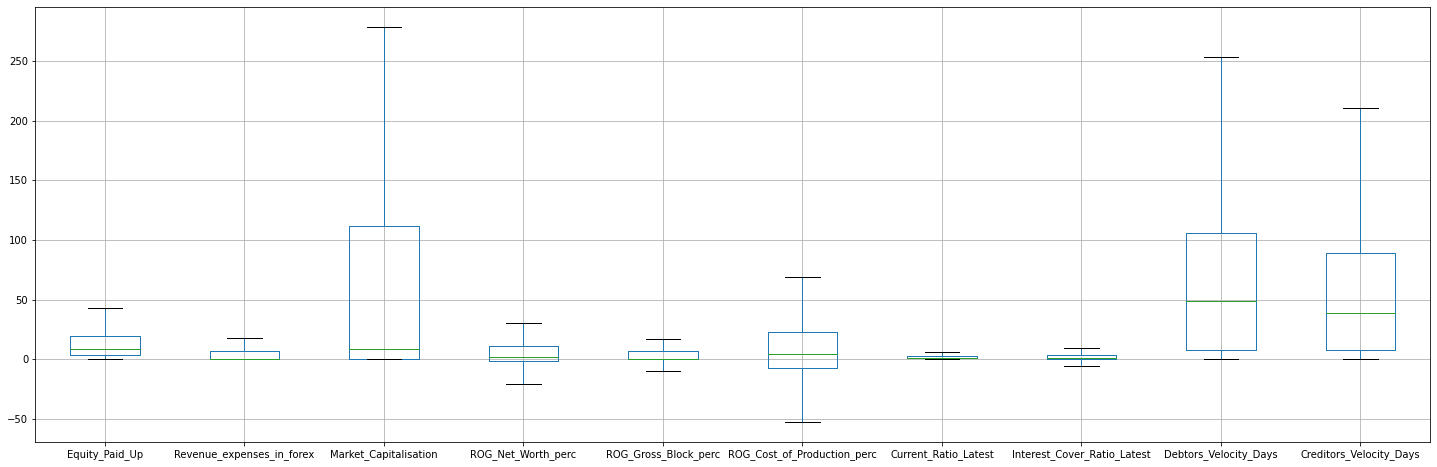

In [341]:
plt.figure(figsize=(25,8))
significant.boxplot();

Interquartile range (IQR) of Networth_Next_Year is  119.81750000000001
Lower limit in Networth_Next_Year:  -175.74125
Upper limit in Networth_Next_Year:  303.52875000000006




Text(0.5, 1.0, 'Histogram of Networth_Next_Year')

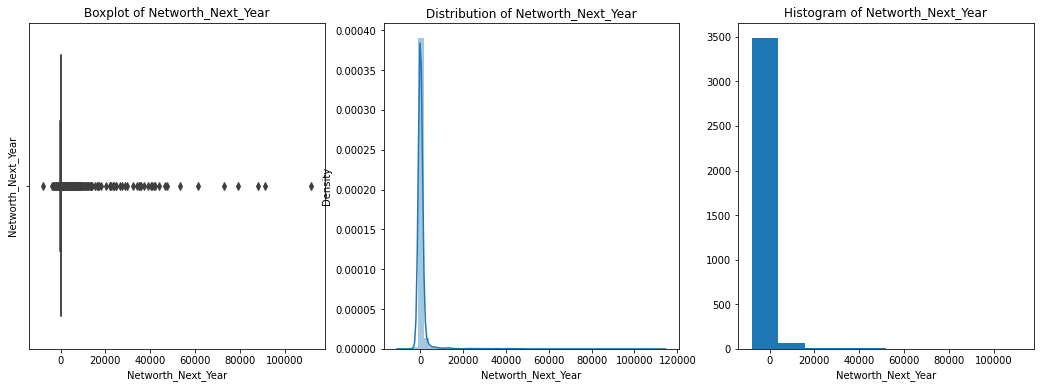

In [343]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(18,6))

Q1=df['Networth_Next_Year'].quantile(q=0.25)
Q3=df['Networth_Next_Year'].quantile(q=0.75)
print('Interquartile range (IQR) of Networth_Next_Year is ', stats.iqr(df['Networth_Next_Year']))
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower limit in Networth_Next_Year: ', L_outliers)
print('Upper limit in Networth_Next_Year: ', U_outliers)
print('\n')
#boxplot
sns.boxplot(x='Networth_Next_Year',data=df,orient='v',ax=ax1);
ax1.set_ylabel('Networth_Next_Year')
ax1.set_title('Boxplot of Networth_Next_Year')

#distplot
sns.distplot(df['Networth_Next_Year'],ax=ax2);
ax2.set_xlabel('Networth_Next_Year')
ax2.set_title('Distribution of Networth_Next_Year')

#histogram
ax3.hist(df['Networth_Next_Year']);
ax3.set_xlabel('Networth_Next_Year')
ax3.set_title('Histogram of Networth_Next_Year')

Interquartile range (IQR) of Equity_Paid_Up is  15.767499999999998
Lower limit in Equity_Paid_Up:  -19.901249999999997
Upper limit in Equity_Paid_Up:  43.168749999999996




Text(0.5, 1.0, 'Histogram of Equity_Paid_Up')

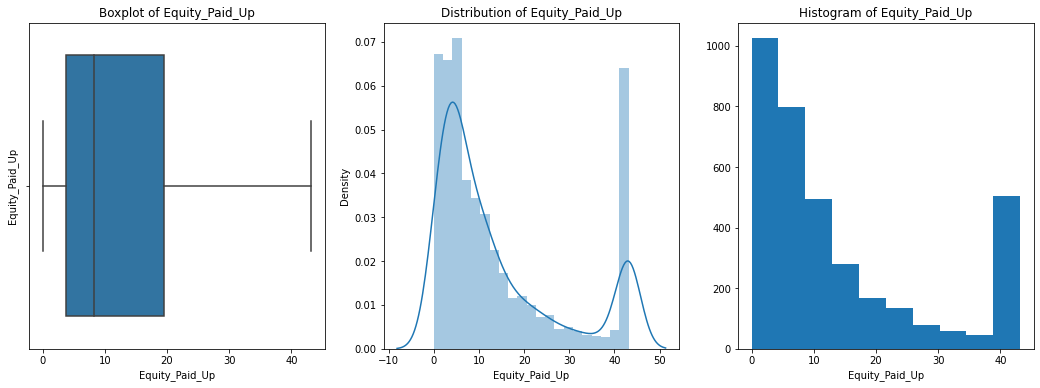

In [181]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(18,6))

Q1=significant['Equity_Paid_Up'].quantile(q=0.25)
Q3=significant['Equity_Paid_Up'].quantile(q=0.75)
print('Interquartile range (IQR) of Equity_Paid_Up is ', stats.iqr(significant['Equity_Paid_Up']))
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower limit in Equity_Paid_Up: ', L_outliers)
print('Upper limit in Equity_Paid_Up: ', U_outliers)
print('\n')
#boxplot
sns.boxplot(x='Equity_Paid_Up',data=significant,orient='v',ax=ax1);
ax1.set_ylabel('Equity_Paid_Up')
ax1.set_title('Boxplot of Equity_Paid_Up')

#distplot
sns.distplot(significant['Equity_Paid_Up'],ax=ax2);
ax2.set_xlabel('Equity_Paid_Up')
ax2.set_title('Distribution of Equity_Paid_Up')

#histogram
ax3.hist(significant['Equity_Paid_Up']);
ax3.set_xlabel('Equity_Paid_Up')
ax3.set_title('Histogram of Equity_Paid_Up')

Interquartile range (IQR) of Revenue_expenses_in_forex is  6.9875
Lower limit in Revenue_expenses_in_forex:  -10.48125
Upper limit in Revenue_expenses_in_forex:  17.46875




Text(0.5, 1.0, 'Histogram of Revenue_expenses_in_forex')

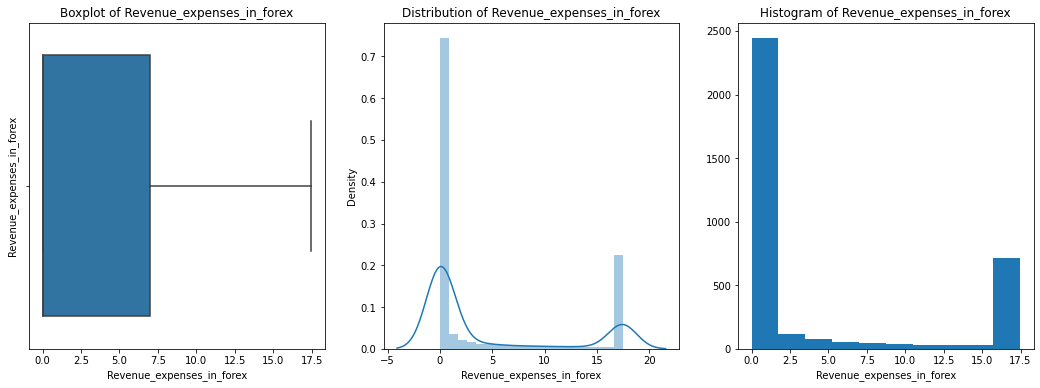

In [182]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(18,6))

Q1=significant['Revenue_expenses_in_forex'].quantile(q=0.25)
Q3=significant['Revenue_expenses_in_forex'].quantile(q=0.75)
print('Interquartile range (IQR) of Revenue_expenses_in_forex is ', stats.iqr(significant['Revenue_expenses_in_forex']))
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower limit in Revenue_expenses_in_forex: ', L_outliers)
print('Upper limit in Revenue_expenses_in_forex: ', U_outliers)
print('\n')
#boxplot
sns.boxplot(x='Revenue_expenses_in_forex',data=significant,orient='v',ax=ax1);
ax1.set_ylabel('Revenue_expenses_in_forex')
ax1.set_title('Boxplot of Revenue_expenses_in_forex')

#distplot
sns.distplot(significant['Revenue_expenses_in_forex'],ax=ax2);
ax2.set_xlabel('Revenue_expenses_in_forex')
ax2.set_title('Distribution of Revenue_expenses_in_forex')

#histogram
ax3.hist(significant['Revenue_expenses_in_forex']);
ax3.set_xlabel('Revenue_expenses_in_forex')
ax3.set_title('Histogram of Revenue_expenses_in_forex')

Interquartile range (IQR) of Market_Capitalisation is  111.45750000000001
Lower limit in Market_Capitalisation:  -167.18625000000003
Upper limit in Market_Capitalisation:  278.64375000000007




Text(0.5, 1.0, 'Histogram of Market_Capitalisation')

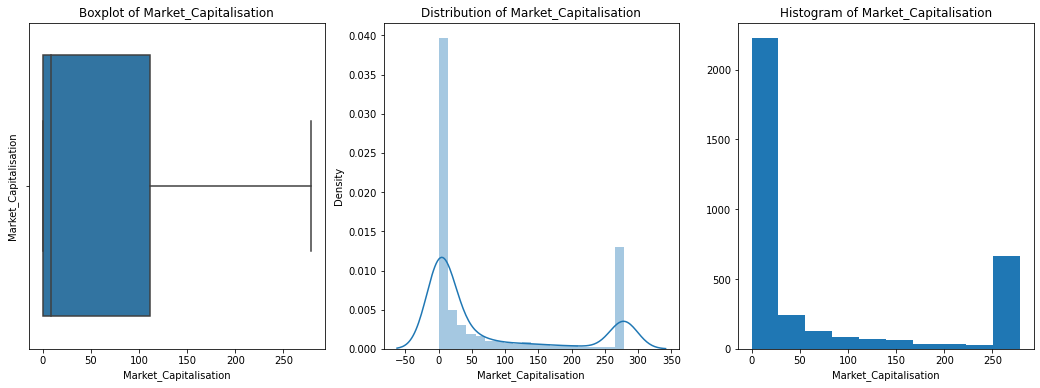

In [183]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(18,6))

Q1=significant['Market_Capitalisation'].quantile(q=0.25)
Q3=significant['Market_Capitalisation'].quantile(q=0.75)
print('Interquartile range (IQR) of Market_Capitalisation is ', stats.iqr(significant['Market_Capitalisation']))
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower limit in Market_Capitalisation: ', L_outliers)
print('Upper limit in Market_Capitalisation: ', U_outliers)
print('\n')
#boxplot
sns.boxplot(x='Market_Capitalisation',data=significant,orient='v',ax=ax1);
ax1.set_ylabel('Market_Capitalisation')
ax1.set_title('Boxplot of Market_Capitalisation')

#distplot
sns.distplot(significant['Market_Capitalisation'],ax=ax2);
ax2.set_xlabel('Market_Capitalisation')
ax2.set_title('Distribution of Market_Capitalisation')

#histogram
ax3.hist(significant['Market_Capitalisation']);
ax3.set_xlabel('Market_Capitalisation')
ax3.set_title('Histogram of Market_Capitalisation')

Interquartile range (IQR) of ROG_Net_Worth_perc is  12.85
Lower limit in ROG_Net_Worth_perc:  -20.7625
Upper limit in ROG_Net_Worth_perc:  30.637499999999996




Text(0.5, 1.0, 'Histogram of ROG_Net_Worth_perc')

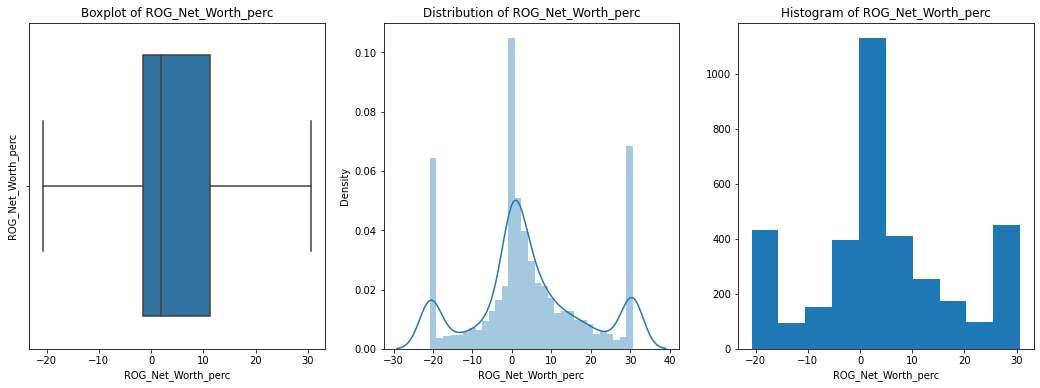

In [184]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(18,6))

Q1=significant['ROG_Net_Worth_perc'].quantile(q=0.25)
Q3=significant['ROG_Net_Worth_perc'].quantile(q=0.75)
print('Interquartile range (IQR) of ROG_Net_Worth_perc is ', stats.iqr(significant['ROG_Net_Worth_perc']))
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower limit in ROG_Net_Worth_perc: ', L_outliers)
print('Upper limit in ROG_Net_Worth_perc: ', U_outliers)
print('\n')
#boxplot
sns.boxplot(x='ROG_Net_Worth_perc',data=significant,orient='v',ax=ax1);
ax1.set_ylabel('ROG_Net_Worth_perc')
ax1.set_title('Boxplot of ROG_Net_Worth_perc')

#distplot
sns.distplot(significant['ROG_Net_Worth_perc'],ax=ax2);
ax2.set_xlabel('ROG_Net_Worth_perc')
ax2.set_title('Distribution of ROG_Net_Worth_perc')

#histogram
ax3.hist(significant['ROG_Net_Worth_perc']);
ax3.set_xlabel('ROG_Net_Worth_perc')
ax3.set_title('Histogram of ROG_Net_Worth_perc')

Interquartile range (IQR) of ROG_Gross_Block_perc is  6.72
Lower limit in ROG_Gross_Block_perc:  -10.08
Upper limit in ROG_Gross_Block_perc:  16.8




Text(0.5, 1.0, 'Histogram of ROG_Gross_Block_perc')

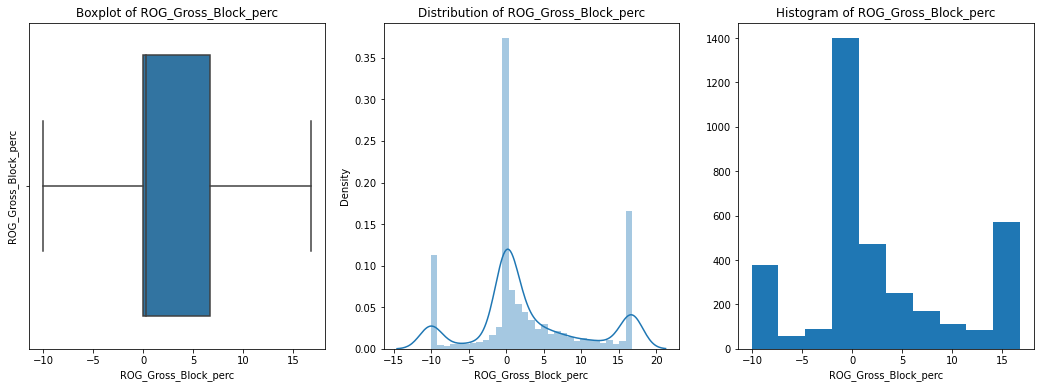

In [185]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(18,6))

Q1=significant['ROG_Gross_Block_perc'].quantile(q=0.25)
Q3=significant['ROG_Gross_Block_perc'].quantile(q=0.75)
print('Interquartile range (IQR) of ROG_Gross_Block_perc is ', stats.iqr(significant['ROG_Gross_Block_perc']))
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower limit in ROG_Gross_Block_perc: ', L_outliers)
print('Upper limit in ROG_Gross_Block_perc: ', U_outliers)
print('\n')
#boxplot
sns.boxplot(x='ROG_Gross_Block_perc',data=significant,orient='v',ax=ax1);
ax1.set_ylabel('ROG_Gross_Block_perc')
ax1.set_title('Boxplot of ROG_Gross_Block_perc')

#distplot
sns.distplot(significant['ROG_Gross_Block_perc'],ax=ax2);
ax2.set_xlabel('ROG_Gross_Block_perc')
ax2.set_title('Distribution of ROG_Gross_Block_perc')

#histogram
ax3.hist(significant['ROG_Gross_Block_perc']);
ax3.set_xlabel('ROG_Gross_Block_perc')
ax3.set_title('Histogram of ROG_Gross_Block_perc')

Interquartile range (IQR) of ROG_Cost_of_Production_perc is  30.365
Lower limit in ROG_Cost_of_Production_perc:  -52.79
Upper limit in ROG_Cost_of_Production_perc:  68.67




Text(0.5, 1.0, 'Histogram of ROG_Cost_of_Production_perc')

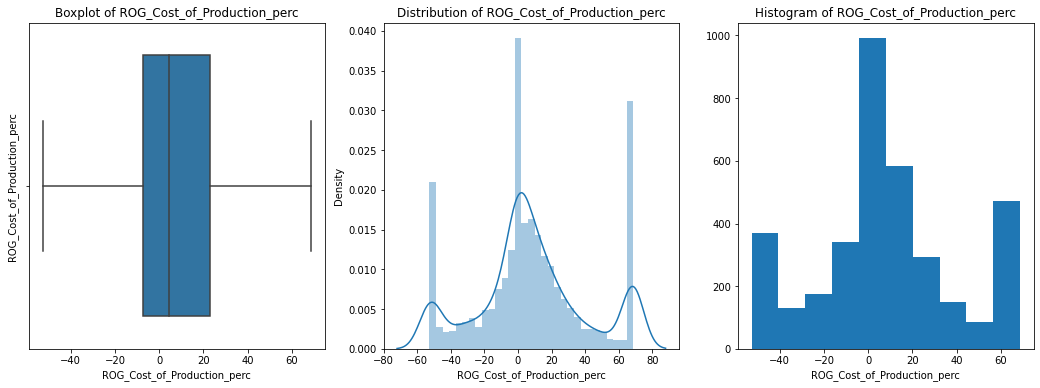

In [186]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(18,6))

Q1=significant['ROG_Cost_of_Production_perc'].quantile(q=0.25)
Q3=significant['ROG_Cost_of_Production_perc'].quantile(q=0.75)
print('Interquartile range (IQR) of ROG_Cost_of_Production_perc is ', stats.iqr(significant['ROG_Cost_of_Production_perc']))
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower limit in ROG_Cost_of_Production_perc: ', L_outliers)
print('Upper limit in ROG_Cost_of_Production_perc: ', U_outliers)
print('\n')
#boxplot
sns.boxplot(x='ROG_Cost_of_Production_perc',data=significant,orient='v',ax=ax1);
ax1.set_ylabel('ROG_Cost_of_Production_perc')
ax1.set_title('Boxplot of ROG_Cost_of_Production_perc')

#distplot
sns.distplot(significant['ROG_Cost_of_Production_perc'],ax=ax2);
ax2.set_xlabel('ROG_Cost_of_Production_perc')
ax2.set_title('Distribution of ROG_Cost_of_Production_perc')

#histogram
ax3.hist(significant['ROG_Cost_of_Production_perc']);
ax3.set_xlabel('ROG_Cost_of_Production_perc')
ax3.set_title('Histogram of ROG_Cost_of_Production_perc')

Interquartile range (IQR) of Current_Ratio_Latest is  1.8900000000000001
Lower limit in Current_Ratio_Latest:  -1.955
Upper limit in Current_Ratio_Latest:  5.605




Text(0.5, 1.0, 'Histogram of Current_Ratio_Latest')

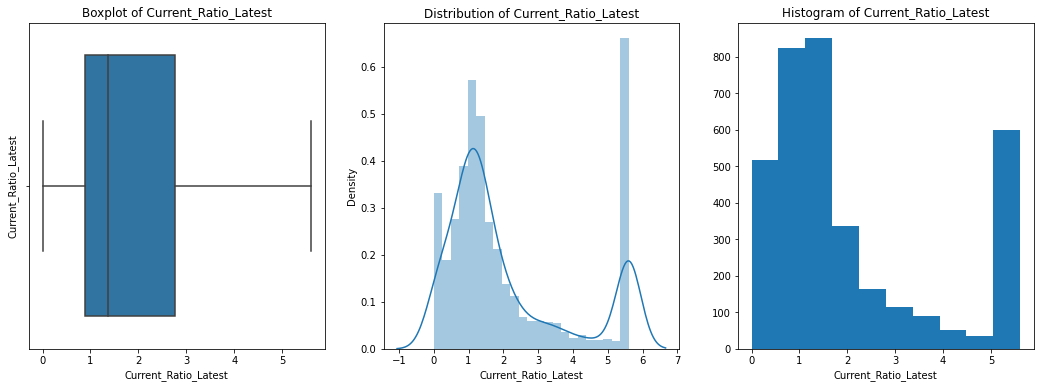

In [187]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(18,6))

Q1=significant['Current_Ratio_Latest'].quantile(q=0.25)
Q3=significant['Current_Ratio_Latest'].quantile(q=0.75)
print('Interquartile range (IQR) of Current_Ratio_Latest is ', stats.iqr(significant['Current_Ratio_Latest']))
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower limit in Current_Ratio_Latest: ', L_outliers)
print('Upper limit in Current_Ratio_Latest: ', U_outliers)
print('\n')
#boxplot
sns.boxplot(x='Current_Ratio_Latest',data=significant,orient='v',ax=ax1);
ax1.set_ylabel('Current_Ratio_Latest')
ax1.set_title('Boxplot of Current_Ratio_Latest')

#distplot
sns.distplot(significant['Current_Ratio_Latest'],ax=ax2);
ax2.set_xlabel('Current_Ratio_Latest')
ax2.set_title('Distribution of Current_Ratio_Latest')

#histogram
ax3.hist(significant['Current_Ratio_Latest']);
ax3.set_xlabel('Current_Ratio_Latest')
ax3.set_title('Histogram of Current_Ratio_Latest')

Interquartile range (IQR) of Interest_Cover_Ratio_Latest is  3.71
Lower limit in Interest_Cover_Ratio_Latest:  -5.5649999999999995
Upper limit in Interest_Cover_Ratio_Latest:  9.274999999999999




Text(0.5, 1.0, 'Histogram of Interest_Cover_Ratio_Latest')

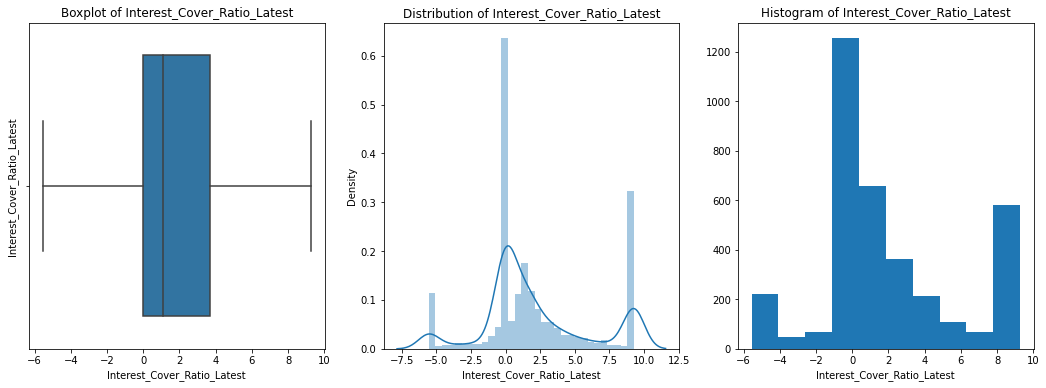

In [188]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(18,6))

Q1=significant['Interest_Cover_Ratio_Latest'].quantile(q=0.25)
Q3=significant['Interest_Cover_Ratio_Latest'].quantile(q=0.75)
print('Interquartile range (IQR) of Interest_Cover_Ratio_Latest is ', stats.iqr(significant['Interest_Cover_Ratio_Latest']))
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower limit in Interest_Cover_Ratio_Latest: ', L_outliers)
print('Upper limit in Interest_Cover_Ratio_Latest: ', U_outliers)
print('\n')
#boxplot
sns.boxplot(x='Interest_Cover_Ratio_Latest',data=significant,orient='v',ax=ax1);
ax1.set_ylabel('Interest_Cover_Ratio_Latest')
ax1.set_title('Boxplot of Interest_Cover_Ratio_Latest')

#distplot
sns.distplot(significant['Interest_Cover_Ratio_Latest'],ax=ax2);
ax2.set_xlabel('Interest_Cover_Ratio_Latest')
ax2.set_title('Distribution of Interest_Cover_Ratio_Latest')

#histogram
ax3.hist(significant['Interest_Cover_Ratio_Latest']);
ax3.set_xlabel('Interest_Cover_Ratio_Latest')
ax3.set_title('Histogram of Interest_Cover_Ratio_Latest')

Interquartile range (IQR) of Debtors_Velocity_Days is  98.0
Lower limit in Debtors_Velocity_Days:  -139.0
Upper limit in Debtors_Velocity_Days:  253.0




Text(0.5, 1.0, 'Histogram of Debtors_Velocity_Days')

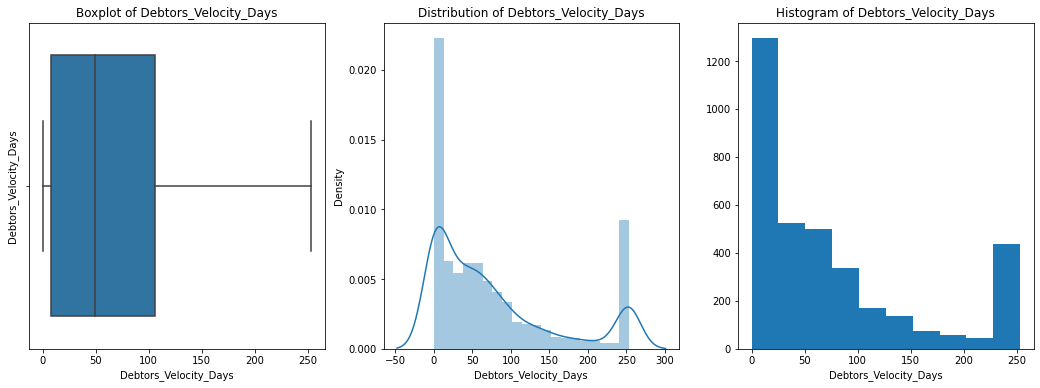

In [189]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(18,6))

Q1=significant['Debtors_Velocity_Days'].quantile(q=0.25)
Q3=significant['Debtors_Velocity_Days'].quantile(q=0.75)
print('Interquartile range (IQR) of Debtors_Velocity_Days is ', stats.iqr(significant['Debtors_Velocity_Days']))
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower limit in Debtors_Velocity_Days: ', L_outliers)
print('Upper limit in Debtors_Velocity_Days: ', U_outliers)
print('\n')
#boxplot
sns.boxplot(x='Debtors_Velocity_Days',data=significant,orient='v',ax=ax1);
ax1.set_ylabel('Debtors_Velocity_Days')
ax1.set_title('Boxplot of Debtors_Velocity_Days')

#distplot
sns.distplot(significant['Debtors_Velocity_Days'],ax=ax2);
ax2.set_xlabel('Debtors_Velocity_Days')
ax2.set_title('Distribution of Debtors_Velocity_Days')

#histogram
ax3.hist(significant['Debtors_Velocity_Days']);
ax3.set_xlabel('Debtors_Velocity_Days')
ax3.set_title('Histogram of Debtors_Velocity_Days')

Interquartile range (IQR) of Creditors_Velocity_Days is  81.0
Lower limit in Creditors_Velocity_Days:  -113.5
Upper limit in Creditors_Velocity_Days:  210.5




Text(0.5, 1.0, 'Histogram of Creditors_Velocity_Days')

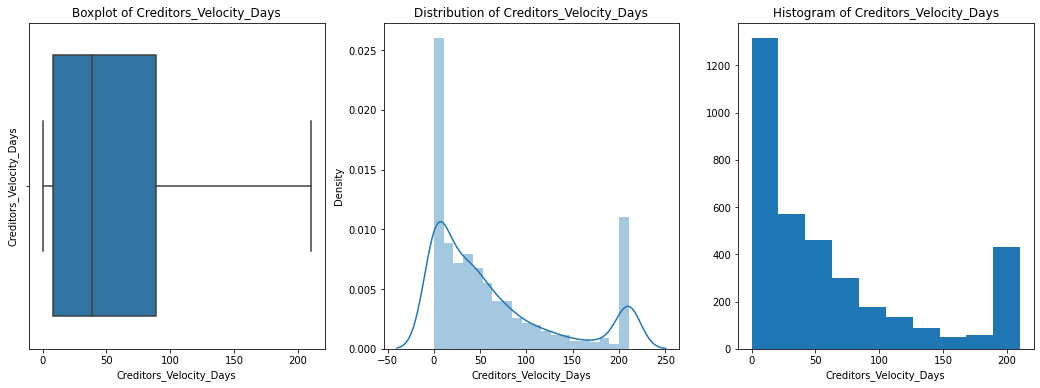

In [190]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(18,6))

Q1=significant['Creditors_Velocity_Days'].quantile(q=0.25)
Q3=significant['Creditors_Velocity_Days'].quantile(q=0.75)
print('Interquartile range (IQR) of Creditors_Velocity_Days is ', stats.iqr(significant['Creditors_Velocity_Days']))
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower limit in Creditors_Velocity_Days: ', L_outliers)
print('Upper limit in Creditors_Velocity_Days: ', U_outliers)
print('\n')
#boxplot
sns.boxplot(x='Creditors_Velocity_Days',data=significant,orient='v',ax=ax1);
ax1.set_ylabel('Creditors_Velocity_Days')
ax1.set_title('Boxplot of Creditors_Velocity_Days')

#distplot
sns.distplot(significant['Creditors_Velocity_Days'],ax=ax2);
ax2.set_xlabel('Creditors_Velocity_Days')
ax2.set_title('Distribution of Creditors_Velocity_Days')

#histogram
ax3.hist(significant['Creditors_Velocity_Days']);
ax3.set_xlabel('Creditors_Velocity_Days')
ax3.set_title('Histogram of Creditors_Velocity_Days')

Bivariate Analysis

In [191]:
corr = significant.corr(method='pearson')
corr

Equity_Paid_Up  Revenue_expenses_in_forex  \
Equity_Paid_Up                     1.000000                   0.382239   
Revenue_expenses_in_forex          0.382239                   1.000000   
Market_Capitalisation              0.563498                   0.556481   
ROG_Net_Worth_perc                -0.013370                   0.115459   
ROG_Gross_Block_perc               0.124665                   0.213060   
ROG_Cost_of_Production_perc       -0.034416                  -0.010970   
Current_Ratio_Latest              -0.177272                  -0.231784   
Interest_Cover_Ratio_Latest        0.055914                   0.265600   
Debtors_Velocity_Days              0.041409                  -0.022277   
Creditors_Velocity_Days            0.105388                  -0.006521   

                             Market_Capitalisation  ROG_Net_Worth_perc  \
Equity_Paid_Up                            0.563498           -0.013370   
Revenue_expenses_in_forex                 0.556481            0.115459   
Market_Capitalisation                     1.000000            0.175334   
ROG_Net_Worth_perc                        0.175334            1.000000   
ROG_Gross_Block_perc                      0.234404            0.273152   
ROG_Cost_of_Production_perc               0.024629            0.236262   
Current_Ratio_Latest                     -0.138875            0.093846   
Interest_Cover_Ratio_Latest               0.277559            0.358827   
Debtors_Velocity_Days                    -0.048842           -0.128715   
Creditors_Velocity_Days                   0.002410           -0.150747   

                             ROG_Gross_Block_perc  \
Equity_Paid_Up                           0.124665   
Revenue_expenses_in_forex                0.213060   
Market_Capitalisation                    0.234404   
ROG_Net_Worth_perc                       0.273152   
ROG_Gross_Block_perc                     1.000000   
ROG_Cost_of_Production_perc              0.190957   
Current_Ratio_Latest                    -0.125220   
Interest_Cover_Ratio_Latest              0.207320   
Debtors_Velocity_Days                   -0.090393   
Creditors_Velocity_Days                 -0.059701   

                             ROG_Cost_of_Production_perc  \
Equity_Paid_Up                                 -0.034416   
Revenue_expenses_in_forex                      -0.010970   
Market_Capitalisation                           0.024629   
ROG_Net_Worth_perc                              0.236262   
ROG_Gross_Block_perc                            0.190957   
ROG_Cost_of_Production_perc                     1.000000   
Current_Ratio_Latest                            0.038515   
Interest_Cover_Ratio_Latest                     0.135755   
Debtors_Velocity_Days                          -0.148421   
Creditors_Velocity_Days                        -0.155636   

                             Current_Ratio_Latest  \
Equity_Paid_Up                          -0.177272   
Revenue_expenses_in_forex               -0.231784   
Market_Capitalisation                   -0.138875   
ROG_Net_Worth_perc                       0.093846   
ROG_Gross_Block_perc                    -0.125220   
ROG_Cost_of_Production_perc              0.038515   
Current_Ratio_Latest                     1.000000   
Interest_Cover_Ratio_Latest              0.032186   
Debtors_Velocity_Days                    0.019803   
Creditors_Velocity_Days                 -0.173258   

                             Interest_Cover_Ratio_Latest  \
Equity_Paid_Up                                  0.055914   
Revenue_expenses_in_forex                       0.265600   
Market_Capitalisation                           0.277559   
ROG_Net_Worth_perc                              0.358827   
ROG_Gross_Block_perc                            0.207320   
ROG_Cost_of_Production_perc                     0.135755   
Current_Ratio_Latest                            0.032186   
Interest_Cover_Ratio_Latest                     1.000000   
Debtors_Velocity_Days         

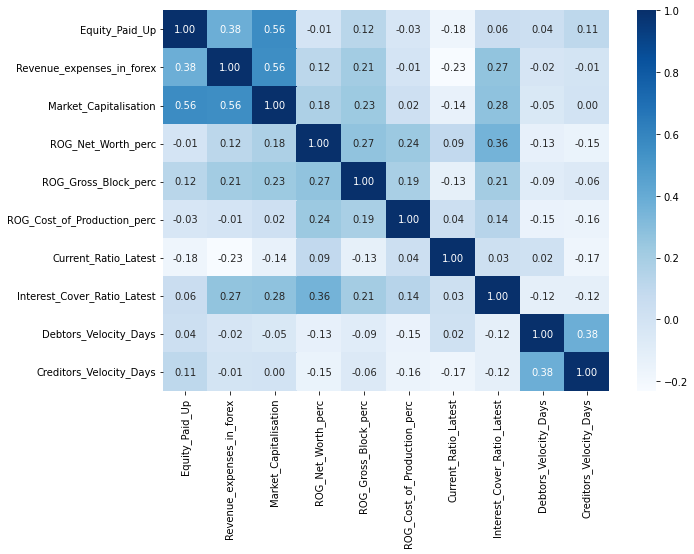

In [192]:
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt = '.2f', cmap="Blues")

Multivariate Analysis

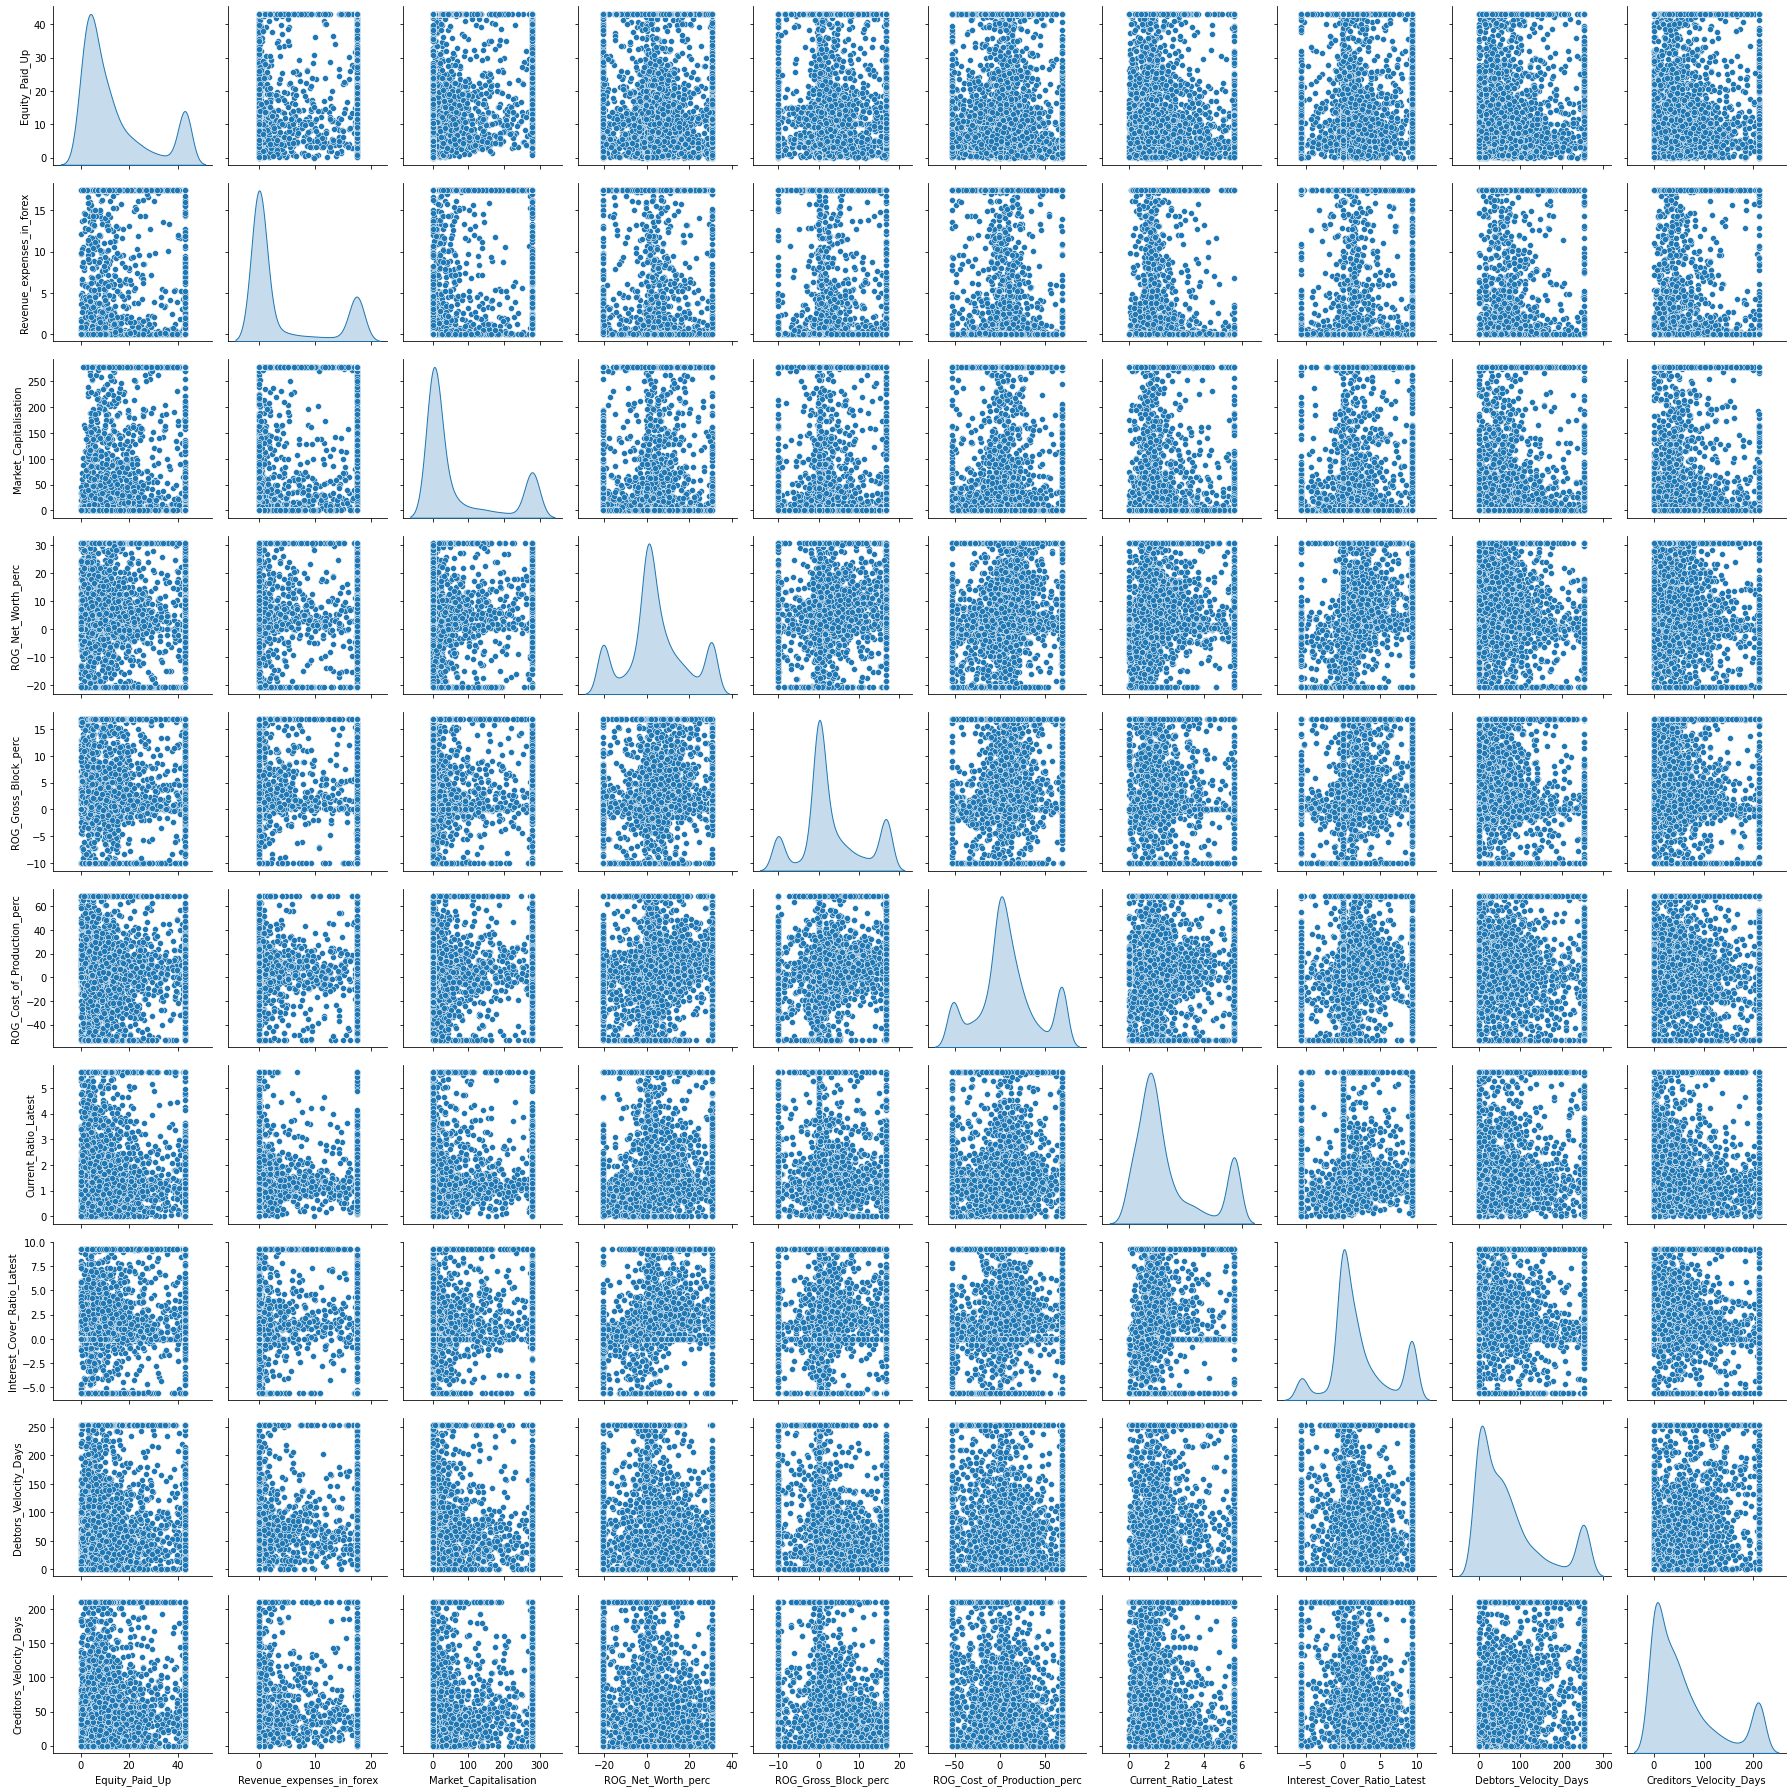

In [193]:
sns.pairplot(significant, diag_kind='kde')
plt.tight_layout()

1.5 Train Test Split

In [194]:
import statsmodels.formula.api as SM

In [195]:
X = df.drop(['Default'], axis=1)
y = df['Default']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42,stratify=df['Default'])

In [196]:
print('Shape of the data after splitting into train and test set:')
print('The training set for the independent variables: ', X_train.shape)
print('The training set for the dependent variables: ', y_train.shape)
print('The test set for the independent variables: ', X_test.shape)
print('The test set for the independent variables: ', y_test.shape)

Shape of the data after splitting into train and test set:
The training set for the independent variables:  (2402, 66)
The training set for the dependent variables:  (2402,)
The test set for the independent variables:  (1184, 66)
The test set for the independent variables:  (1184,)


In [197]:
#Statsmodel requires the labelled data, therefore, concatinating the y label to the train set.
df_train = pd.concat([X_train,y_train], axis=1)
df_test = pd.concat([X_test,y_test], axis=1)

In [198]:
print('Shape of the data after concatenating into train and test set:')
print('The shape of training set: ', df_train.shape)
print('The shape of test set: ', df_test.shape)

Shape of the data after concatenating into train and test set:
The shape of training set:  (2402, 67)
The shape of test set:  (1184, 67)


In [199]:
df_train["Default"].value_counts()

0    2142
1     260
Name: Default, dtype: int64

In [200]:
df_test["Default"].value_counts()

0    1056
1     128
Name: Default, dtype: int64

In [201]:
print('The proportion of defaulters in training set: ', 260/len(df_train.Default))
print('The proportion of defaulters in test set: ', 128/len(df_test.Default))

The proportion of defaulters in training set:  0.10824313072439634
The proportion of defaulters in test set:  0.10810810810810811


In [202]:
print('The proportion of non-defaulters in training set: ', 2142/len(df_train.Default))
print('The proportion of non-defaulters in test set: ', 1056/len(df_test.Default))

The proportion of non-defaulters in training set:  0.8917568692756037
The proportion of non-defaulters in test set:  0.8918918918918919


1.6 Build Logistic Regression Model (using statsmodel library) on most important variables on Train Dataset and choose the optimum cutoff. Also showcase your model building approach

Feature Selection
The optimal machine learning problem approach is to perform extensive EDA on dataset and understand properties of the predictors before even getting into training models on these variables. However, this is not always possible. Sometimes the dataset has lot many variables; sometimes even hundreds or even thousands of variables, which can quickly outrun human comprehension.

Feature selection is the process of tuning down the number of predictor variables used by the models you build.

For example, when faced with two models with the same or nearly the same score, but with the latter model using more variables, your immediate instinct should be to choose the one with fewer variables. That model is simpler to train, simpler to understand, easier to run, and less time consuming.

Lets start with feature selection methods & validate them back using manual feature selection using backward elimination approach:

In [203]:
import statsmodels.formula.api as SM

Lets check all the columns we have in the dataset

In [204]:
df_train.columns

Index(['Co_Code', 'Equity_Paid_Up', 'Networth', 'Capital_Employed',
       'Total_Debt', 'Gross_Block', 'Net_Working_Capital', 'Current_Assets',
       'Current_Liabilities_and_Provisions', 'Total_Assets_by_Liabilities',
       'Gross_Sales', 'Net_Sales', 'Other_Income', 'Value_Of_Output',
       'Cost_of_Production', 'Selling_Cost', 'PBIDT', 'PBDT', 'PBIT', 'PBT',
       'PAT', 'Adjusted_PAT', 'CP', 'Revenue_earnings_in_forex',
       'Revenue_expenses_in_forex', 'Capital_expenses_in_forex',
       'Book_Value_Unit_Curr', 'Book_Value_Adj_Unit_Curr',
       'Market_Capitalisation', 'CEPS_annualised_Unit_Curr',
       'Cash_Flow_From_Operating_Activities',
       'Cash_Flow_From_Investing_Activities',
       'Cash_Flow_From_Financing_Activities', 'ROG_Net_Worth_perc',
       'ROG_Capital_Employed_perc', 'ROG_Gross_Block_perc',
       'ROG_Gross_Sales_perc', 'ROG_Net_Sales_perc',
       'ROG_Cost_of_Production_perc', 'ROG_Total_Assets_perc',
       'ROG_PBIDT_perc', 'ROG_PBDT_perc', 'ROG

Before starting model building, lets look at the problem of multicollinearity. Multicollinearity occurs when two or more independent variables are highly correlated with one another in a regression model.

In [205]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [206]:
calc_vif(X_train).sort_values(by='VIF', ascending = True)

variables          VIF
65                  Networth_Next_Year     1.267104
35                ROG_Gross_Block_perc     1.545711
48      ROG_Market_Capitalisation_perc     1.707102
62             Inventory_Velocity_Days     1.927059
38         ROG_Cost_of_Production_perc     2.030572
..                                 ...          ...
10                         Gross_Sales   765.401445
11                           Net_Sales  1420.352199
25           Capital_expenses_in_forex          NaN
46  ROG_Revenue_earnings_in_forex_perc          NaN
47  ROG_Revenue_expenses_in_forex_perc          NaN

[66 rows x 2 columns]

In [207]:
vif_value = calc_vif(X_train).sort_values(by='VIF', ascending = True)
print (vif_value)

                             variables          VIF
65                  Networth_Next_Year     1.267104
35                ROG_Gross_Block_perc     1.545711
48      ROG_Market_Capitalisation_perc     1.707102
62             Inventory_Velocity_Days     1.927059
38         ROG_Cost_of_Production_perc     2.030572
..                                 ...          ...
10                         Gross_Sales   765.401445
11                           Net_Sales  1420.352199
25           Capital_expenses_in_forex          NaN
46  ROG_Revenue_earnings_in_forex_perc          NaN
47  ROG_Revenue_expenses_in_forex_perc          NaN

[66 rows x 2 columns]


Here, we see that the value of VIF is high for many variables. Here, we may drop variables with VIF more than 5 (very high correlation) & build our model

In [208]:
vif_select = vif_value[vif_value.VIF < 5]
vif_select

variables       VIF
65                   Networth_Next_Year  1.267104
35                 ROG_Gross_Block_perc  1.545711
48       ROG_Market_Capitalisation_perc  1.707102
62              Inventory_Velocity_Days  1.927059
38          ROG_Cost_of_Production_perc  2.030572
0                               Co_Code  2.117919
61              Creditors_Velocity_Days  2.318367
51               Inventory_Ratio_Latest  2.343611
49                 Current_Ratio_Latest  2.468457
60                Debtors_Velocity_Days  2.507265
52                 Debtors_Ratio_Latest  2.544727
54          Interest_Cover_Ratio_Latest  2.550858
31  Cash_Flow_From_Investing_Activities  2.606963
32  Cash_Flow_From_Financing_Activities  2.997172
33                   ROG_Net_Worth_perc  3.012510
23            Revenue_earnings_in_forex  3.102019
39                ROG_Total_Assets_perc  3.271459
24            Revenue_expenses_in_forex  3.727331
34            ROG_Capital_Employed_perc  3.846218
30  Cash_Flow_From_Operating_Activities  4.064302
12                         Other_Income  4.591733
28                Market_Capitalisation  4.600072
1                        Equity_Paid_Up  4.678059
15                         Selling_Cost  4.915284

In [209]:
vif_select.variables

65                     Networth_Next_Year
35                   ROG_Gross_Block_perc
48         ROG_Market_Capitalisation_perc
62                Inventory_Velocity_Days
38            ROG_Cost_of_Production_perc
0                                 Co_Code
61                Creditors_Velocity_Days
51                 Inventory_Ratio_Latest
49                   Current_Ratio_Latest
60                  Debtors_Velocity_Days
52                   Debtors_Ratio_Latest
54            Interest_Cover_Ratio_Latest
31    Cash_Flow_From_Investing_Activities
32    Cash_Flow_From_Financing_Activities
33                     ROG_Net_Worth_perc
23              Revenue_earnings_in_forex
39                  ROG_Total_Assets_perc
24              Revenue_expenses_in_forex
34              ROG_Capital_Employed_perc
30    Cash_Flow_From_Operating_Activities
12                           Other_Income
28                  Market_Capitalisation
1                          Equity_Paid_Up
15                           Selli

In [210]:
vif_select.shape

(24, 2)

In [211]:
vif_drop = vif_value[vif_value.VIF > 5]
vif_drop

variables          VIF
6                  Net_Working_Capital     6.123621
29           CEPS_annualised_Unit_Curr     6.669437
4                           Total_Debt     7.634589
50           Fixed_Assets_Ratio_Latest     9.314984
64      Value_of_Output_by_Gross_Block     9.556765
53   Total_Asset_Turnover_Ratio_Latest    10.477821
63     Value_of_Output_by_Total_Assets    11.868736
5                          Gross_Block    12.506033
27            Book_Value_Adj_Unit_Curr    12.757095
2                             Networth    12.925464
44                        ROG_PAT_perc    13.638922
42                       ROG_PBIT_perc    14.115042
26                Book_Value_Unit_Curr    16.700939
45                         ROG_CP_perc    16.888270
40                      ROG_PBIDT_perc    17.089039
21                        Adjusted_PAT    17.369123
43                        ROG_PBT_perc    17.990306
59                   APATM_perc_Latest    19.798317
41                       ROG_PBDT_perc    23.490693
8   Current_Liabilities_and_Provisions    25.496900
57                   PBDTM_perc_Latest    29.095575
56                   PBITM_perc_Latest    30.928778
58                     CPM_perc_Latest    32.687383
18                                PBIT    33.328393
55                  PBIDTM_perc_Latest    33.943762
7                       Current_Assets    35.768505
16                               PBIDT    40.255560
14                  Cost_of_Production    49.270213
3                     Capital_Employed    70.773415
20                                 PAT    79.604145
19                                 PBT    83.082898
9          Total_Assets_by_Liabilities   103.241701
22                                  CP   129.703715
17                                PBDT   136.888203
37                  ROG_Net_Sales_perc   528.761716
36                ROG_Gross_Sales_perc   529.653909
13                     Value_Of_Output   652.516519
10                         Gross_Sales   765.401445
11                           Net_Sales  1420.352199

In [212]:
vif_drop.shape

(39, 2)

In [213]:
df.columns

Index(['Co_Code', 'Equity_Paid_Up', 'Networth', 'Capital_Employed',
       'Total_Debt', 'Gross_Block', 'Net_Working_Capital', 'Current_Assets',
       'Current_Liabilities_and_Provisions', 'Total_Assets_by_Liabilities',
       'Gross_Sales', 'Net_Sales', 'Other_Income', 'Value_Of_Output',
       'Cost_of_Production', 'Selling_Cost', 'PBIDT', 'PBDT', 'PBIT', 'PBT',
       'PAT', 'Adjusted_PAT', 'CP', 'Revenue_earnings_in_forex',
       'Revenue_expenses_in_forex', 'Capital_expenses_in_forex',
       'Book_Value_Unit_Curr', 'Book_Value_Adj_Unit_Curr',
       'Market_Capitalisation', 'CEPS_annualised_Unit_Curr',
       'Cash_Flow_From_Operating_Activities',
       'Cash_Flow_From_Investing_Activities',
       'Cash_Flow_From_Financing_Activities', 'ROG_Net_Worth_perc',
       'ROG_Capital_Employed_perc', 'ROG_Gross_Block_perc',
       'ROG_Gross_Sales_perc', 'ROG_Net_Sales_perc',
       'ROG_Cost_of_Production_perc', 'ROG_Total_Assets_perc',
       'ROG_PBIDT_perc', 'ROG_PBDT_perc', 'ROG

Fitting the logistic regression model on dataset

Model 1

In [214]:
f_1 = 'Default ~ Co_Code + Equity_Paid_Up + Other_Income + Selling_Cost + Revenue_earnings_in_forex + Revenue_expenses_in_forex + Market_Capitalisation + Cash_Flow_From_Operating_Activities + Cash_Flow_From_Investing_Activities + Cash_Flow_From_Financing_Activities + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + ROG_Gross_Block_perc +  ROG_Cost_of_Production_perc + ROG_Total_Assets_perc + ROG_Market_Capitalisation_perc + Current_Ratio_Latest + Inventory_Ratio_Latest + Debtors_Ratio_Latest + Interest_Cover_Ratio_Latest + Debtors_Velocity_Days + Creditors_Velocity_Days + Inventory_Velocity_Days'

In [215]:
model_1 = SM.logit(formula = f_1, data=df_train).fit()
model_1

Optimization terminated successfully.
         Current function value: 0.201008
         Iterations 8


Studying whether this equation is significant or not

In [216]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2378
Method:                           MLE   Df Model:                           23
Date:                Mon, 20 Jun 2022   Pseudo R-squ.:                  0.4137
Time:                        19:06:59   Log-Likelihood:                -482.82
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                3.853e-129
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -0.3360      0.196     -1.717      0.086      -0.720       0.048
Co_Code                             -3.175e-05   7.07e-06     -4.491      0.000   -4.56e-05   -1.79e-05
Equity_Paid_Up                          0.0210      0.008      2.768      0.006       0.006       0.036
Other_Income                            0.0300      0.037      0.807      0.420      -0.043       0.103
Selling_Cost                           -0.0303      0.044     -0.685      0.493      -0.117       0.056
Revenue_earnings_in_forex              -0.0301      0.019     -1.562      0.118      -0.068       0.008
Revenue_expenses_in_forex               0.0327      0.020      1.626      0.104      -0.007       0.072
Market_Capitalisation                  -0.0096      0.002     -5.196      0.000      -0.013      -0.006
Cash_Flow_From_Operating_Activities    -0.0071      0.013     -0.540      0.589      -0.033       0.019
Cash_Flow_From_Investing_Activities     0.0150      0.025      0.595      0.552      -0.034       0.064
Cash_Flow_From_Financing_Activities     0.0086      0.023      0.366      0.714      -0.037       0.054
ROG_Net_Worth_perc                     -0.0489      0.008     -5.768      0.000      -0.065      -0.032
ROG_Capital_Employed_perc              -0.0016      0.008     -0.196      0.844      -0.017       0.014
ROG_Gross_Block_perc                   -0.0276      0.015     -1.893      0.058      -0.056       0.001
ROG_Cost_of_Production_perc            -0.0089      0.003     -3.354      0.001      -0.014      -0.004
ROG_Total_Assets_perc                  -0.0097      0.008     -1.212      0.225      -0.025       0.006
ROG_Market_Capitalisation_perc         -0.0006      0.002     -0.301      0.763      -0.005       0.003
Current_Ratio_Latest                   -0.7468      0.085     -8.826      0.000      -0.913      -0.581
Inventory_Ratio_Latest                 -0.0120      0.014     -0.865      0.387      -0.039       0.015
Debtors_Ratio_Latest                   -0.0180      0.015     -1.179      0.238      -0.048       0.012
Interest_Cover_Ratio_Latest            -0.1543      0.032     -4.858      0.000      -0.217      -0.092
Debtors_Velocity_Days                  -0.0036      0.001     -3.397      0.001      -0.006      -0.002
Creditors_Velocity_Days                 0.0040      0.001      3.438      0.001       0.002       0.006
Inventory_Velocity_Days                -0.0015      0.001     -1.266      0.205      -0.004       0.001
=======================================================================================================
"""

We can see that few variables are insignificant & may not be useful to discriminate cases of default

In [217]:
print('The adjusted pseudo R-square value is',1 - ((model_1.llf - model_1.df_model)/model_1.llnull))

The adjusted pseudo R-square value is 0.3857435369722072


The adjusted pseudo R-square seems to be lower than Pseudo R-square value which means there are insignificant variables present in the model

Lets try & remove variables whose p value is greater than 0.05 & rebuild our model

Model 2

In [218]:
f_2 = 'Default ~ Equity_Paid_Up + Market_Capitalisation + ROG_Net_Worth_perc + ROG_Gross_Block_perc +  ROG_Cost_of_Production_perc + Current_Ratio_Latest + Interest_Cover_Ratio_Latest + Debtors_Velocity_Days + Creditors_Velocity_Days'

In [219]:
model_2 = SM.logit(formula = f_2, data=df_train).fit()
model_2

Optimization terminated successfully.
         Current function value: 0.210234
         Iterations 8


In [220]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2392
Method:                           MLE   Df Model:                            9
Date:                Mon, 20 Jun 2022   Pseudo R-squ.:                  0.3868
Time:                        19:07:06   Log-Likelihood:                -504.98
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                2.413e-131
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -0.8732      0.166     -5.252      0.000      -1.199      -0.547
Equity_Paid_Up                  0.0172      0.007      2.495      0.013       0.004       0.031
Market_Capitalisation          -0.0101      0.002     -6.205      0.000      -0.013      -0.007
ROG_Net_Worth_perc             -0.0559      0.007     -7.990      0.000      -0.070      -0.042
ROG_Gross_Block_perc           -0.0441      0.013     -3.290      0.001      -0.070      -0.018
ROG_Cost_of_Production_perc    -0.0097      0.003     -3.797      0.000      -0.015      -0.005
Current_Ratio_Latest           -0.7665      0.088     -8.700      0.000      -0.939      -0.594
Interest_Cover_Ratio_Latest    -0.1703      0.030     -5.604      0.000      -0.230      -0.111
Debtors_Velocity_Days          -0.0040      0.001     -3.960      0.000      -0.006      -0.002
Creditors_Velocity_Days         0.0042      0.001      3.759      0.000       0.002       0.006
===============================================================================================
"""

We can see that all variables except are significant & may be useful to discriminate cases of default

In [221]:
print('The adjusted pseudo R-square value is',1 - ((model_2.llf - model_2.df_model)/model_2.llnull))

The adjusted pseudo R-square value is 0.3758339515632504


We see that adjusted R sq is now close to Rsq, thus suggesting lesser insignificant variables in the model

Let us also check the multicollinearity of the model using Variance Inflation Factor (VIF) for the predictor variables

In [222]:
calc_vif(X_train[['Equity_Paid_Up', 'Market_Capitalisation', 'ROG_Net_Worth_perc', 'ROG_Gross_Block_perc', 'ROG_Cost_of_Production_perc', 'Current_Ratio_Latest', 'Interest_Cover_Ratio_Latest', 'Debtors_Velocity_Days', 'Creditors_Velocity_Days']]).sort_values(by='VIF', ascending = True)

variables       VIF
4  ROG_Cost_of_Production_perc  1.135404
3         ROG_Gross_Block_perc  1.292666
2           ROG_Net_Worth_perc  1.370568
6  Interest_Cover_Ratio_Latest  1.553236
5         Current_Ratio_Latest  1.612578
8      Creditors_Velocity_Days  2.007755
7        Debtors_Velocity_Days  2.082292
1        Market_Capitalisation  2.440010
0               Equity_Paid_Up  2.683910

We can see that multicollinearity still exists but lets not drop them as VIFs are not very high

We also notice that current model has no insignificant variables and can be used for prediction purposes.

Lets test the prediction of this model on train and test dataset

Prediction on the Data

Let us first check the distribution plot of the logit function values

Text(0.5, 1.0, 'Distribution Plot')

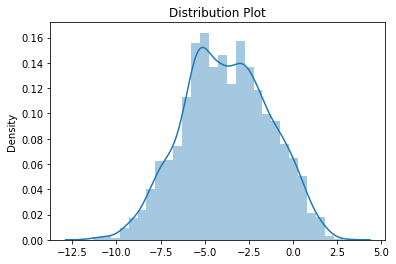

In [223]:
sns.distplot(model_2.fittedvalues);
plt.title('Distribution Plot')

Now, let us see the predicted probability values:

In [224]:
y_predict_train = model_2.predict(X_train)
y_predict_train

842     0.005488
1057    0.000770
1595    0.000303
100     0.566242
1191    0.032449
          ...   
1815    0.005662
2852    0.177780
1505    0.001374
375     0.437327
3428    0.001094
Length: 2402, dtype: float64

Text(0.5, 1.0, 'Boxplot of Target variable and train data')

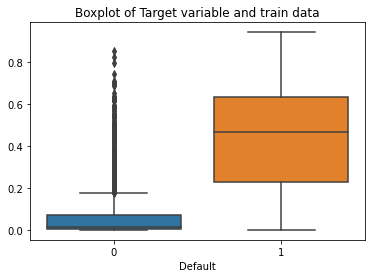

In [225]:
sns.boxplot(x=df['Default'],y=y_predict_train)
plt.xlabel('Default');
plt.title('Boxplot of Target variable and train data')

From the above boxplot, we need to decide on one such value of a cut-off which will give us the most reasonable descriptive power of the model. Let us take a cut-off of 0.07 and check.

Let us now see the predicted classes

In [226]:
y_class_pred_train=[]
for i in range(0,len(y_predict_train)):
    if np.array(y_predict_train)[i]>0.07:
        a=1
    else:
        a=0
    y_class_pred_train.append(a)

Text(0.5, 1.0, 'Confusion Matrix for train set: 0.07 cut-off')

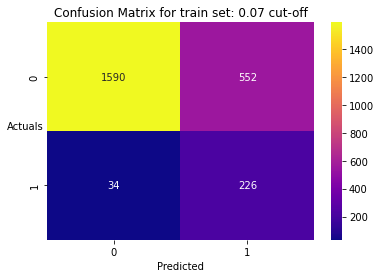

In [227]:
#print(metrics.confusion_matrix(y_test, y_predict))
sns.heatmap((metrics.confusion_matrix(y_train,y_class_pred_train)),annot=True,fmt='.5g'
            ,cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('Confusion Matrix for train set: 0.07 cut-off')

In [228]:
tn, fp, fn, tp = metrics.confusion_matrix(y_train,y_class_pred_train).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp)

True Negative: 1590 
False Positives: 552 
False Negatives: 34 
True Positives: 226


In [229]:
print(metrics.classification_report(y_train,y_class_pred_train,digits=3))

              precision    recall  f1-score   support

           0      0.979     0.742     0.844      2142
           1      0.290     0.869     0.435       260

    accuracy                          0.756      2402
   macro avg      0.635     0.806     0.640      2402
weighted avg      0.905     0.756     0.800      2402



As observed above, accuracy of the model i.e. %overall correct predictions is 75.6%
Sensitivity of the model is 86.9% i.e. 86.9% of those defaulted were correctly identified as defaulters by the model

Let us take a cut-off of 0.08 and check if our predictions have improved

In [230]:
y_class_pred_train=[]
for i in range(0,len(y_predict_train)):
    if np.array(y_predict_train)[i]>0.08:
        a=1
    else:
        a=0
    y_class_pred_train.append(a)

Checking the accuracy of the model using confusion matrix for training set

Text(0.5, 1.0, 'Confusion Matrix for train set: 0.08 cut-off')

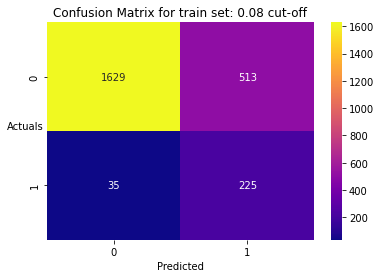

In [231]:
#print(metrics.confusion_matrix(y_test, y_predict))
sns.heatmap((metrics.confusion_matrix(y_train,y_class_pred_train)),annot=True,fmt='.5g'
            ,cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('Confusion Matrix for train set: 0.08 cut-off')

In [232]:
tn, fp, fn, tp = metrics.confusion_matrix(y_train,y_class_pred_train).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp)

True Negative: 1629 
False Positives: 513 
False Negatives: 35 
True Positives: 225


In [233]:
print(metrics.classification_report(y_train,y_class_pred_train,digits=3))

              precision    recall  f1-score   support

           0      0.979     0.761     0.856      2142
           1      0.305     0.865     0.451       260

    accuracy                          0.772      2402
   macro avg      0.642     0.813     0.653      2402
weighted avg      0.906     0.772     0.812      2402



Accuracy of the model i.e. %overall correct predictions has increased from 75.6% to 77.2% but sensitivity of the model has dropped slightly from 86.9% to 86.5%

In [234]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

AUC: 0.902


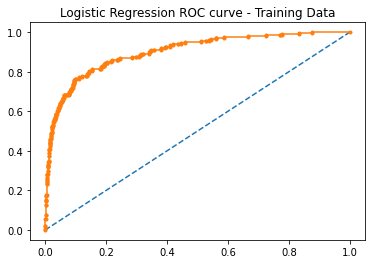

In [235]:
probs_logcl = y_predict_train
logcl_train_auc = roc_auc_score(y_train, probs_logcl)
print('AUC: %.3f' % logcl_train_auc)
logcl_train_fpr, logcl_train_tpr, logcl_train_thresholds = roc_curve(y_train, probs_logcl)
plt.title('Logistic Regression ROC curve - Training Data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(logcl_train_fpr, logcl_train_tpr, marker='.')
plt.show()

1.7	Validate the Model on Test Dataset and state the performance matrices. Also state interpretation from the model

Prediction on the test set

In [236]:
y_predict_test = model_2.predict(X_test)
y_predict_test

251     0.307286
3493    0.009355
3063    0.013006
2384    0.050853
1679    0.000512
          ...   
1321    0.042306
2666    0.003960
773     0.002560
3488    0.001319
2956    0.085441
Length: 1184, dtype: float64

In [237]:
y_class_pred_test=[]
for i in range(0,len(y_predict_test)):
    if np.array(y_predict_test)[i]>0.07:
        a=1
    else:
        a=0
    y_class_pred_test.append(a)

Checking the accuracy of the model using confusion matrix for test set

Text(0.5, 1.0, 'Confusion Matrix for test set: 0.07 cut-off')

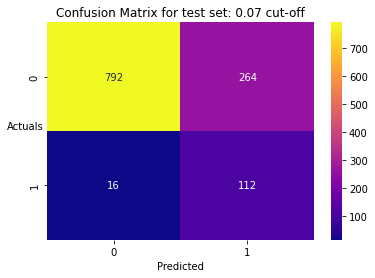

In [238]:
#print(metrics.confusion_matrix(y_test, y_predict))
sns.heatmap((metrics.confusion_matrix(y_test,y_class_pred_test)),annot=True,fmt='.5g'
            ,cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('Confusion Matrix for test set: 0.07 cut-off')

In [239]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test,y_class_pred_test).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp)

True Negative: 792 
False Positives: 264 
False Negatives: 16 
True Positives: 112


Let us now go ahead and print the classification report to check the various other parameters

In [240]:
print(metrics.classification_report(y_test,y_class_pred_test,digits=3))

              precision    recall  f1-score   support

           0      0.980     0.750     0.850      1056
           1      0.298     0.875     0.444       128

    accuracy                          0.764      1184
   macro avg      0.639     0.812     0.647      1184
weighted avg      0.906     0.764     0.806      1184



As observed above, accuracy of the model i.e. %overall correct predictions is 76.4%
Sensitivity of the model is 87.5% i.e. 87.5% of those defaulted were correctly identified as defaulters by the model

In [241]:
y_class_pred_test=[]
for i in range(0,len(y_predict_test)):
    if np.array(y_predict_test)[i]>0.08:
        a=1
    else:
        a=0
    y_class_pred_test.append(a)

Text(0.5, 1.0, 'Confusion Matrix for test set: 0.08 cut-off')

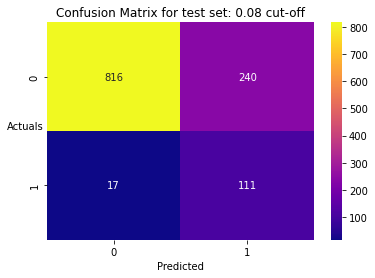

In [242]:
#print(metrics.confusion_matrix(y_test, y_predict))
sns.heatmap((metrics.confusion_matrix(y_test,y_class_pred_test)),annot=True,fmt='.5g'
            ,cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('Confusion Matrix for test set: 0.08 cut-off')

In [243]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test,y_class_pred_test).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp)

True Negative: 816 
False Positives: 240 
False Negatives: 17 
True Positives: 111


In [244]:
print(metrics.classification_report(y_test,y_class_pred_test,digits=3))

              precision    recall  f1-score   support

           0      0.980     0.773     0.864      1056
           1      0.316     0.867     0.463       128

    accuracy                          0.783      1184
   macro avg      0.648     0.820     0.664      1184
weighted avg      0.908     0.783     0.821      1184



AUC: 0.893


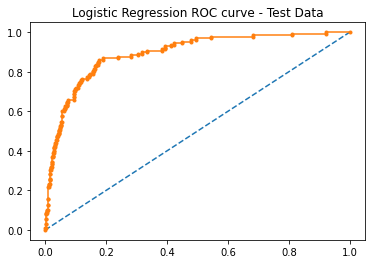

In [245]:
probs_logcl = y_predict_test
logcl_test_auc = roc_auc_score(y_test, probs_logcl)
print('AUC: %.3f' % logcl_test_auc)
logcl_test_fpr, logcl_test_tpr, logcl_test_thresholds = roc_curve(y_test, probs_logcl)
plt.title('Logistic Regression ROC curve - Test Data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(logcl_test_fpr, logcl_test_tpr, marker='.')
plt.show()

In [281]:
logcl_metrics=classification_report(y_train, y_class_pred_train,output_dict=True)
df=pd.DataFrame(logcl_metrics).transpose()
logcl_train_precision=round(df.loc["1"][0],2)
logcl_train_recall=round(df.loc["1"][1],2)
logcl_train_f1=round(df.loc["1"][2],2)
logcl_train_acc=round(df.loc["accuracy"][0],2)
print ('logcl_train_precision ',logcl_train_precision)
print ('logcl_train_recall ',logcl_train_recall)
print ('logcl_train_f1 ',logcl_train_f1)
print ('logcl_train_acc ',logcl_train_acc)
logcl_metrics=classification_report(y_test, y_class_pred_test,output_dict=True)
df=pd.DataFrame(logcl_metrics).transpose()
logcl_test_precision=round(df.loc["1"][0],2)
logcl_test_recall=round(df.loc["1"][1],2)
logcl_test_f1=round(df.loc["1"][2],2)
logcl_test_acc=round(df.loc["accuracy"][0],2)
print ('logcl_test_precision ',logcl_test_precision)
print ('logcl_test_recall ',logcl_test_recall)
print ('logcl_test_f1 ',logcl_test_f1)
print ('logcl_test_acc ',logcl_test_acc)

logcl_train_precision  0.3
logcl_train_recall  0.87
logcl_train_f1  0.45
logcl_train_acc  0.77
logcl_test_precision  0.32
logcl_test_recall  0.87
logcl_test_f1  0.46
logcl_test_acc  0.78


Accuracy of the model i.e. %overall correct predictions has increased from 76.4% to 78.3% and sensitivity of the model has dropped slightly from 87.5 to 86.7%

We may choose cutoff of 0.08 as it gave higher model sensitivity & overall accuracy of the model in test dataset

1.8 Build a Random Forest Model on Train Dataset. Also showcase your model building approach

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid_rfcl = { 'max_depth': [5,10,15],
                   'max_features': [4,5,6,7],
                   'min_samples_leaf': [10,50,70],
                   'min_samples_split': [30,50,70], 
                   'n_estimators': [200,250,300]}

rfcl = RandomForestClassifier(random_state=42)

grid_search_rfcl = GridSearchCV(estimator = rfcl, param_grid = param_grid_rfcl, cv = 5)

In [ ]:
grid_search_rfcl.fit(X_train, y_train) 
print(grid_search_rfcl.best_params_) 
best_grid_rfcl = grid_search_rfcl.best_estimator_ 
best_grid_rfcl

{'max_depth': 5, 'max_features': 5, 'min_samples_leaf': 10, 'min_samples_split': 50, 'n_estimators': 200}


RandomForestClassifier(max_depth=5, max_features=5, min_samples_leaf=10,
                       min_samples_split=50, n_estimators=200, random_state=42)

In [ ]:
param_grid_rfcl = { 'max_depth': [2, 5, 10],
                   'max_features': [3,4,5,6],
                   'min_samples_leaf': [5, 10, 15],
                   'min_samples_split': [30,40,50,60], 
                   'n_estimators': [190, 200, 250]}

rfcl = RandomForestClassifier(random_state=42)

grid_search_rfcl = GridSearchCV(estimator = rfcl, param_grid = param_grid_rfcl, cv = 5)

In [ ]:
grid_search_rfcl.fit(X_train, y_train) 
print(grid_search_rfcl.best_params_) 
best_grid_rfcl = grid_search_rfcl.best_estimator_ 
best_grid_rfcl

{'max_depth': 10, 'max_features': 6, 'min_samples_leaf': 5, 'min_samples_split': 30, 'n_estimators': 250}


RandomForestClassifier(max_depth=10, max_features=6, min_samples_leaf=5,
                       min_samples_split=30, n_estimators=250, random_state=42)

In [ ]:
param_grid_rfcl = { 'max_depth': [5, 10, 15],
                   'max_features': [4,5,6,7],
                   'min_samples_leaf': [3, 5, 10],
                   'min_samples_split': [20,30,40,50], 
                   'n_estimators': [200, 250, 280]}

rfcl = RandomForestClassifier(random_state=42)

grid_search_rfcl = GridSearchCV(estimator = rfcl, param_grid = param_grid_rfcl, cv = 5)

In [ ]:
grid_search_rfcl.fit(X_train, y_train) 
print(grid_search_rfcl.best_params_) 
best_grid_rfcl = grid_search_rfcl.best_estimator_ 
best_grid_rfcl

{'max_depth': 10, 'max_features': 6, 'min_samples_leaf': 3, 'min_samples_split': 20, 'n_estimators': 280}


RandomForestClassifier(max_depth=10, max_features=6, min_samples_leaf=3,
                       min_samples_split=20, n_estimators=280, random_state=42)

In [ ]:
param_grid_rfcl = { 'max_depth': [5, 10, 12],
                   'max_features': [5,6,7],
                   'min_samples_leaf': [3, 5, 10],
                   'min_samples_split': [15,20,25], 
                   'n_estimators': [280, 300, 320]}

rfcl = RandomForestClassifier(random_state=42)

grid_search_rfcl = GridSearchCV(estimator = rfcl, param_grid = param_grid_rfcl, cv = 5)

In [ ]:
grid_search_rfcl.fit(X_train, y_train) 
print(grid_search_rfcl.best_params_) 
best_grid_rfcl = grid_search_rfcl.best_estimator_ 
best_grid_rfcl

{'max_depth': 10, 'max_features': 7, 'min_samples_leaf': 3, 'min_samples_split': 15, 'n_estimators': 280}


RandomForestClassifier(max_depth=10, max_features=7, min_samples_leaf=3,
                       min_samples_split=15, n_estimators=280, random_state=42)

In [ ]:
print (pd.DataFrame(best_grid_rfcl.feature_importances_, 
                    columns = ["Imp"], 
                    index = X_train.columns).sort_values('Imp',ascending=False))

                                         Imp
Networth_Next_Year                  0.297995
Networth                            0.164431
Book_Value_Unit_Curr                0.144347
Book_Value_Adj_Unit_Curr            0.138015
Capital_Employed                    0.024893
...                                      ...
Inventory_Ratio_Latest              0.000573
Revenue_earnings_in_forex           0.000234
ROG_Revenue_expenses_in_forex_perc  0.000000
ROG_Revenue_earnings_in_forex_perc  0.000000
Capital_expenses_in_forex           0.000000

[66 rows x 1 columns]


In [ ]:
ytrain_predict_rfcl = best_grid_rfcl.predict(X_train)
ytest_predict_rfcl = best_grid_rfcl.predict(X_test)

In [ ]:
ytest_predict_rfcl
ytest_predict_prob_rfcl=best_grid_rfcl.predict_proba(X_test)
ytest_predict_prob_rfcl
pd.DataFrame(ytest_predict_prob_rfcl).head()

0         1
0  0.057887  0.942113
1  0.999384  0.000616
2  0.997857  0.002143
3  0.977262  0.022738
4  1.000000  0.000000

Performance metrics - Train data

AUC and ROC

AUC: 1.000


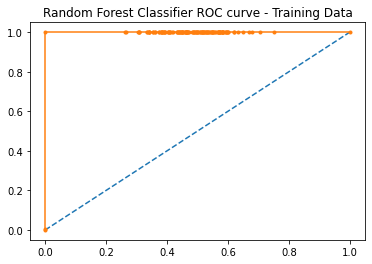

In [ ]:
probs_rfcl = best_grid_rfcl.predict_proba(X_train)
probs_rfcl = probs_rfcl[:, 1]
rfcl_train_auc = roc_auc_score(y_train, probs_rfcl)
print('AUC: %.3f' % rfcl_train_auc)
rfcl_train_fpr, rfcl_train_tpr, rfcl_train_thresholds = roc_curve(y_train, probs_rfcl)
plt.title('Random Forest Classifier ROC curve - Training Data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(rfcl_train_fpr, rfcl_train_tpr, marker='.')
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

Text(0.5, 1.0, 'Random Forest Classifier using Grid Search Confusion Matrix - Training Data')

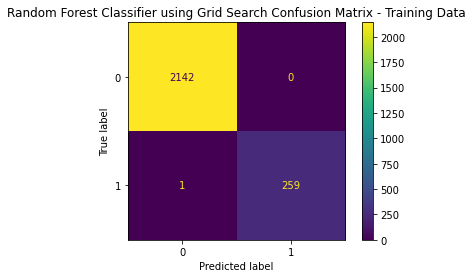

In [ ]:
plot_confusion_matrix(best_grid_rfcl,X_train,y_train);
plt.title('Random Forest Classifier using Grid Search Confusion Matrix - Training Data')

In [ ]:
confusion_matrix(y_train, ytrain_predict_rfcl)

array([[2142,    0],
       [   1,  259]])

In [ ]:
rfcl_train_acc=best_grid_rfcl.score(X_train,y_train) 
rfcl_train_acc

0.9995836802664446

In [ ]:
print(classification_report(y_train, ytrain_predict_rfcl))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2142
           1       1.00      1.00      1.00       260

    accuracy                           1.00      2402
   macro avg       1.00      1.00      1.00      2402
weighted avg       1.00      1.00      1.00      2402



1.9 Validate the Random Forest Model on test Dataset and state the performance matrices. Also state interpretation from the model

AUC: 1.000


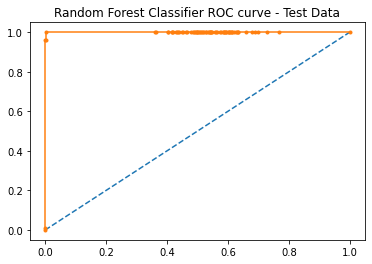

In [ ]:
probs_rfcl = best_grid_rfcl.predict_proba(X_test)
probs_rfcl = probs_rfcl[:, 1]
rfcl_test_auc = roc_auc_score(y_test, probs_rfcl)
print('AUC: %.3f' % rfcl_test_auc)
rfcl_test_fpr, rfcl_test_tpr, rfcl_test_thresholds = roc_curve(y_test, probs_rfcl, pos_label=1)
plt.title('Random Forest Classifier ROC curve - Test Data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(rfcl_test_fpr, rfcl_test_tpr, marker='.')
plt.show()

In [ ]:
confusion_matrix(y_test, ytest_predict_rfcl)

array([[1055,    1],
       [   5,  123]])

Text(0.5, 1.0, 'Random Forest Classifier using Grid Search Confusion Matrix - Test Data')

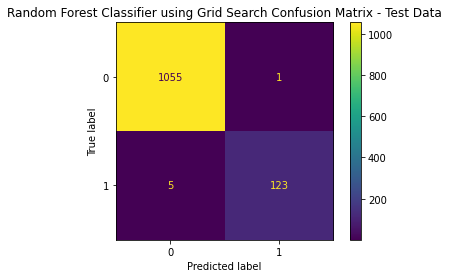

In [ ]:
plot_confusion_matrix(best_grid_rfcl,X_test,y_test);
plt.title('Random Forest Classifier using Grid Search Confusion Matrix - Test Data')

In [ ]:
rfcl_test_acc=best_grid_rfcl.score(X_test,y_test)
rfcl_test_acc

0.9949324324324325

In [ ]:
print(classification_report(y_test, ytest_predict_rfcl))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1056
           1       0.99      0.96      0.98       128

    accuracy                           0.99      1184
   macro avg       0.99      0.98      0.99      1184
weighted avg       0.99      0.99      0.99      1184



1.10 Build a LDA Model on Train Dataset. Also showcase your model building approach

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
param_grid_lda = {
    'solver': ['svd','lsqr','eigen'],
    'shrinkage': ['auto', 'none', 'default'],
    'tol': [0.001,0.0001,0.00001]
}

lda = LinearDiscriminantAnalysis()

grid_search_lda = GridSearchCV(estimator = lda, param_grid = param_grid_lda, cv = 3,n_jobs=-1,scoring='accuracy')

In [ ]:
grid_search_lda.fit(X_train, y_train)
print(grid_search_lda.best_params_)
best_grid_lda = grid_search_lda.best_estimator_
best_grid_lda

{'shrinkage': 'auto', 'solver': 'lsqr', 'tol': 0.001}


LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr', tol=0.001)

In [196]:
param_grid_lda = {
    'solver': ['svd','lsqr','eigen'],
    'shrinkage': ['auto', 'none', 'default'],
    'tol': [0.01,0.001,0.0001]
}

lda = LinearDiscriminantAnalysis()

grid_search_lda = GridSearchCV(estimator = lda, param_grid = param_grid_lda, cv = 3,n_jobs=-1,scoring='accuracy')

In [197]:
grid_search_lda.fit(X_train, y_train)
print(grid_search_lda.best_params_)
best_grid_lda = grid_search_lda.best_estimator_
best_grid_lda

{'shrinkage': 'auto', 'solver': 'lsqr', 'tol': 0.01}


LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr', tol=0.01)

In [ ]:
ytrain_predict_lda_grid = best_grid_lda.predict(X_train)
ytest_predict_lda_grid = best_grid_lda.predict(X_test)

In [ ]:
ytest_predict_lda_prob=best_grid_lda.predict_proba(X_test)
pd.DataFrame(ytest_predict_lda_prob).head()

0         1
0  0.949752  0.050248
1  0.998980  0.001020
2  0.999931  0.000069
3  0.996857  0.003143
4  0.999412  0.000588

In [ ]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, best_grid_lda.coef_[0][idx]))

The coefficient for Co_Code is -2.248674546283934e-05
The coefficient for Equity_Paid_Up is 0.0008160010153744485
The coefficient for Networth is -0.02588103975869721
The coefficient for Capital_Employed is 0.002305134876254939
The coefficient for Total_Debt is 0.003200492351840587
The coefficient for Gross_Block is 0.0033361589104549446
The coefficient for Net_Working_Capital is 0.0017207753528725358
The coefficient for Current_Assets is -0.004623836833827238
The coefficient for Current_Liabilities_and_Provisions is 0.013473389646968216
The coefficient for Total_Assets_by_Liabilities is 0.0052343941881512505
The coefficient for Gross_Sales is 0.0002577553988792952
The coefficient for Net_Sales is 0.0011736216485269504
The coefficient for Other_Income is 0.13046061421393956
The coefficient for Value_Of_Output is -7.002387095325635e-05
The coefficient for Cost_of_Production is -0.004243188432630088
The coefficient for Selling_Cost is -0.07021958990297025
The coefficient for PBIDT is -0.

In [ ]:
lda_train_acc_grid = best_grid_lda.score(X_train, y_train)
print("The accuracy of the model is {}".format(lda_train_acc_grid))

The accuracy of the model is 0.9425478767693589


AUC: 0.963


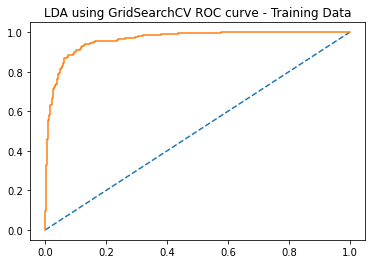

In [ ]:
probs_lda_grid = grid_search_lda.predict_proba(X_train)
probs_lda_grid = probs_lda_grid[:, 1]
auc_train_lda_grid = roc_auc_score(y_train, probs_lda_grid)
print('AUC: %.3f' % auc_train_lda_grid)
lda_grid_train_fpr, lda_grid_train_tpr, lda_grid_train_thresholds = roc_curve(y_train, probs_lda_grid, pos_label=1)
plt.title('LDA using GridSearchCV ROC curve - Training Data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(lda_grid_train_fpr, lda_grid_train_tpr)
plt.show()

Text(0.5, 1.0, 'LDA using Grid Search Confusion Matrix - Training Data')

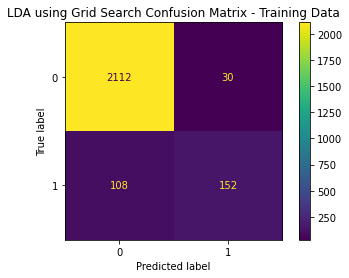

In [ ]:
plot_confusion_matrix(grid_search_lda,X_train,y_train);
plt.title('LDA using Grid Search Confusion Matrix - Training Data')

In [ ]:
print(classification_report(y_train, ytrain_predict_lda_grid))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2142
           1       0.84      0.58      0.69       260

    accuracy                           0.94      2402
   macro avg       0.89      0.79      0.83      2402
weighted avg       0.94      0.94      0.94      2402



1.11 Validate the LDA Model on test Dataset and state the performance matrices. Also state interpretation from the model

In [ ]:
lda_test_acc_grid = best_grid_lda.score(X_test, y_test)
print("The accuracy of the model is {}".format(lda_test_acc_grid))

The accuracy of the model is 0.9400337837837838


AUC: 0.955


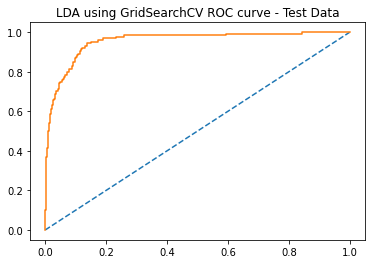

In [ ]:
probs_lda_grid = grid_search_lda.predict_proba(X_test)
probs_lda_grid = probs_lda_grid[:, 1]
auc_test_lda_grid = roc_auc_score(y_test, probs_lda_grid)
print('AUC: %.3f' % auc_test_lda_grid)
lda_grid_test_fpr, lda_grid_test_tpr, lda_grid_test_thresholds = roc_curve(y_test, probs_lda_grid, pos_label=1)
plt.title('LDA using GridSearchCV ROC curve - Test Data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(lda_grid_test_fpr, lda_grid_test_tpr)
plt.show()

Text(0.5, 1.0, 'LDA using Grid Search Confusion Matrix - Test Data')

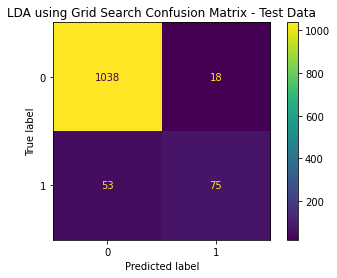

In [ ]:
plot_confusion_matrix(grid_search_lda,X_test,y_test);
plt.title('LDA using Grid Search Confusion Matrix - Test Data')

In [ ]:
print(classification_report(y_test, ytest_predict_lda_grid))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1056
           1       0.81      0.59      0.68       128

    accuracy                           0.94      1184
   macro avg       0.88      0.78      0.82      1184
weighted avg       0.94      0.94      0.94      1184



1.12 Compare the performances of Logistics, Random Forest and LDA models (include ROC Curve)

In [ ]:
rfcl_metrics=classification_report(y_train, ytrain_predict_rfcl,output_dict=True)
df=pd.DataFrame(rfcl_metrics).transpose()
rfcl_train_precision=round(df.loc["1"][0],2)
rfcl_train_recall=round(df.loc["1"][1],2)
rfcl_train_f1=round(df.loc["1"][2],2)
print ('rfcl_train_precision ',rfcl_train_precision)
print ('rfcl_train_recall ',rfcl_train_recall)
print ('rfcl_train_f1 ',rfcl_train_f1)
rfcl_metrics=classification_report(y_test, ytest_predict_rfcl,output_dict=True)
df=pd.DataFrame(rfcl_metrics).transpose()
rfcl_test_precision=round(df.loc["1"][0],2)
rfcl_test_recall=round(df.loc["1"][1],2)
rfcl_test_f1=round(df.loc["1"][2],2)
print ('rfcl_test_precision ',rfcl_test_precision)
print ('rfcl_test_recall ',rfcl_test_recall)
print ('rfcl_test_f1 ',rfcl_test_f1)

rfcl_train_precision  1.0
rfcl_train_recall  1.0
rfcl_train_f1  1.0
rfcl_test_precision  0.99
rfcl_test_recall  0.96
rfcl_test_f1  0.98


In [ ]:
lda_grid_metrics=classification_report(y_train, ytrain_predict_lda_grid,output_dict=True)
df=pd.DataFrame(lda_grid_metrics).transpose()
lda_grid_train_precision=round(df.loc["1"][0],2)
lda_grid_train_recall=round(df.loc["1"][1],2)
lda_grid_train_f1=round(df.loc["1"][2],2)
print ('lda_grid_train_precision ',lda_grid_train_precision)
print ('lda_grid_train_recall ',lda_grid_train_recall)
print ('lda_grid_train_f1 ',lda_grid_train_f1)
lda_grid_metrics=classification_report(y_test, ytest_predict_lda_grid,output_dict=True)
df=pd.DataFrame(lda_grid_metrics).transpose()
lda_grid_test_precision=round(df.loc["1"][0],2)
lda_grid_test_recall=round(df.loc["1"][1],2)
lda_grid_test_f1=round(df.loc["1"][2],2)
print ('lda_grid_test_precision ',lda_grid_test_precision)
print ('lda_grid_test_recall ',lda_grid_test_recall)
print ('lda_grid_test_f1 ',lda_grid_test_f1)

lda_grid_train_precision  0.84
lda_grid_train_recall  0.58
lda_grid_train_f1  0.69
lda_grid_test_precision  0.81
lda_grid_test_recall  0.59
lda_grid_test_f1  0.68


1.13 State Recommendations from the above models

In [ ]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'Logistic Train':[logcl_train_acc,logcl_train_auc,logcl_train_recall,logcl_train_precision,logcl_train_f1],
        'Logistic Test':[logcl_test_acc,logcl_test_auc,logcl_test_recall,logcl_test_precision,logcl_test_f1],
        'Random Forest Train':[rfcl_train_acc,rfcl_train_auc,rfcl_train_recall,rfcl_train_precision,rfcl_train_f1],
        'Random Forest Test':[rfcl_test_acc,rfcl_test_auc,rfcl_test_recall,rfcl_test_precision,rfcl_test_f1],
       'LDA Grid Train':[lda_train_acc_grid,auc_train_lda_grid,lda_grid_train_recall,lda_grid_train_precision,lda_grid_train_f1],
        'LDA Grid Test':[lda_test_acc_grid,auc_test_lda_grid,lda_grid_test_recall,lda_grid_test_precision,lda_grid_test_f1]},index=index)
round(data,3)

Logistic Train  Logistic Test  Random Forest Train  \
Accuracy            0.770          0.780                  1.0   
AUC                 0.902          0.893                  1.0   
Recall              0.870          0.870                  1.0   
Precision           0.300          0.320                  1.0   
F1 Score            0.450          0.460                  1.0   

           Random Forest Test  LDA Grid Train  LDA Grid Test  
Accuracy                0.995           0.943          0.940  
AUC                     1.000           0.963          0.955  
Recall                  0.960           0.580          0.590  
Precision               0.990           0.840          0.810  
F1 Score                0.980           0.690          0.680

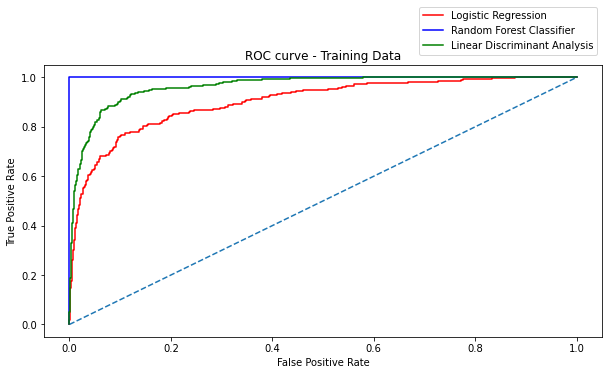

In [ ]:
plt.figure(figsize=(10,5))
plt.title('ROC curve - Training Data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(logcl_train_fpr, logcl_train_tpr,color='red',label="Logistic Regression")
plt.plot(rfcl_train_fpr, rfcl_train_tpr,color='blue',label="Random Forest Classifier")
plt.plot(lda_grid_train_fpr, lda_grid_train_tpr,color='green',label="Linear Discriminant Analysis")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

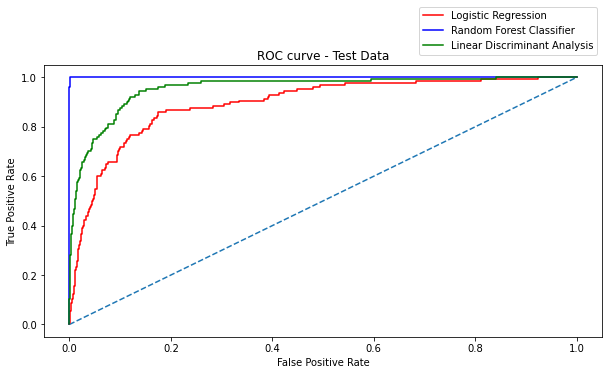

In [ ]:
plt.figure(figsize=(10,5))
plt.title('ROC curve - Test Data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(logcl_test_fpr, logcl_test_tpr,color='red',label="Logistic Regression")
plt.plot(rfcl_test_fpr, rfcl_test_tpr,color='blue',label="Random Forest Classifier")
plt.plot(lda_grid_test_fpr, lda_grid_test_tpr,color='green',label="Linear Discriminant Analysis")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')